# Task 2, 3, 4 (Cleaning, Feature Engineering, Neural Networks, AutoML)

# Task 2:
## Data Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('loan.csv',encoding='utf-8')

D:\Softwares\Anaconda\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = data.copy()

In [4]:
total_values = np.product(df.shape)
print('Total values present in dataset:',total_values)
miss_values = df.isnull().sum().sum()
print('Total missing values:',miss_values)

Total values present in dataset: 65666046
Total missing values: 17998490


In [5]:
total = df.isnull().sum().sort_values(ascending=False)

percent = df.isnull().sum()/df.isnull().count() *100
percent = (round(percent,2).sort_values(ascending=False))

# Creating a data frame:
df_missing = pd.concat([total, percent], axis =1 , keys =["Total Missing Values", "Percentage %"]).sort_values(by ="Percentage %", ascending = False)

D:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [6]:
top_missing_values = df_missing[df_missing["Percentage %"]>0]
top_missing_values.reset_index(inplace=True)

In [7]:
top_missing_values

,index,Total Missing Values,Percentage %
0,dti_joint,886870,99.94
1,verification_status_joint,886868,99.94
2,annual_inc_joint,886868,99.94
3,il_util,868762,97.90
4,mths_since_rcnt_il,866569,97.65
5,inq_last_12m,866007,97.59
6,total_bal_il,866007,97.59
7,total_cu_tl,866007,97.59
8,max_bal_bc,866007,97.59
9,open_acc_6m,866007,97.59


In [8]:
# Step 1 Droping all the columns which have missing values more than 50% and the redundant columns

df.drop(top_missing_values[top_missing_values["Percentage %"]>50]["index"], axis = 1, inplace=True)

In [9]:
# Step 2 Dropping all other Redundant Columns With No Meaning on the Target Variable

df.drop(['title','earliest_cr_line','last_pymnt_d',
         'last_credit_pull_d','zip_code','addr_state',
         'next_pymnt_d',"policy_code", "id", "member_id",
         "emp_title","url","purpose"], axis = 1, inplace=True)

In [10]:
# Returns the data frame of the repective data types
numerical_cols = df.select_dtypes(include=("int64","float64"))

categorical_cols = df.select_dtypes(include=("object"))

In [11]:
categorical_cols.columns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'initial_list_status', 'application_type'],
      dtype='object')

In [12]:
#create dummies for some categorical values
df = pd.get_dummies(df,columns=['grade','sub_grade','home_ownership',
                                'verification_status','loan_status','pymnt_plan'
                                ,'initial_list_status','application_type'],drop_first=True)

In [13]:
df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,...,loan_status_Does not meet the credit policy. Status:Charged Off,loan_status_Does not meet the credit policy. Status:Fully Paid,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Issued,loan_status_Late (16-30 days),loan_status_Late (31-120 days),pymnt_plan_y,initial_list_status_w,application_type_JOINT
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,10+ years,24000.0,Dec-2011,27.65,...,0,0,1,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,< 1 year,30000.0,Dec-2011,1.00,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,10+ years,12252.0,Dec-2011,8.72,...,0,0,1,0,0,0,0,0,0,0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,10+ years,49200.0,Dec-2011,20.00,...,0,0,1,0,0,0,0,0,0,0
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,1 year,80000.0,Dec-2011,17.94,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#from fancyimpute import MICE

In [15]:
#from mice.mice import MICEData

In [16]:
#imp = MICEData(df)
#imp.set_imputer('x1', formula='x2 + np.square(x2) + x3')
#for j in range(20):
#    imp.update_all()

In [17]:
#df.info()

In [18]:
df.fillna(method='ffill',inplace=True)

# Task 2:
## Correlation of the data with Interest Rate (For Feature Engineering)

In [19]:
#import the necessary package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from itertools import chain, combinations
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import Normalizer

import warnings
warnings.filterwarnings("ignore")

In [20]:
size = df.shape[0]

rs = 1

Train, Test = train_test_split(df, test_size= 0.3, random_state= rs)


CV, Test = train_test_split(Test, test_size=0.5, random_state = rs)

print(Train.shape, CV.shape, Test.shape)

(621165, 91) (133107, 91) (133107, 91)


Text(0.5,0,'Correlation with int_rate')

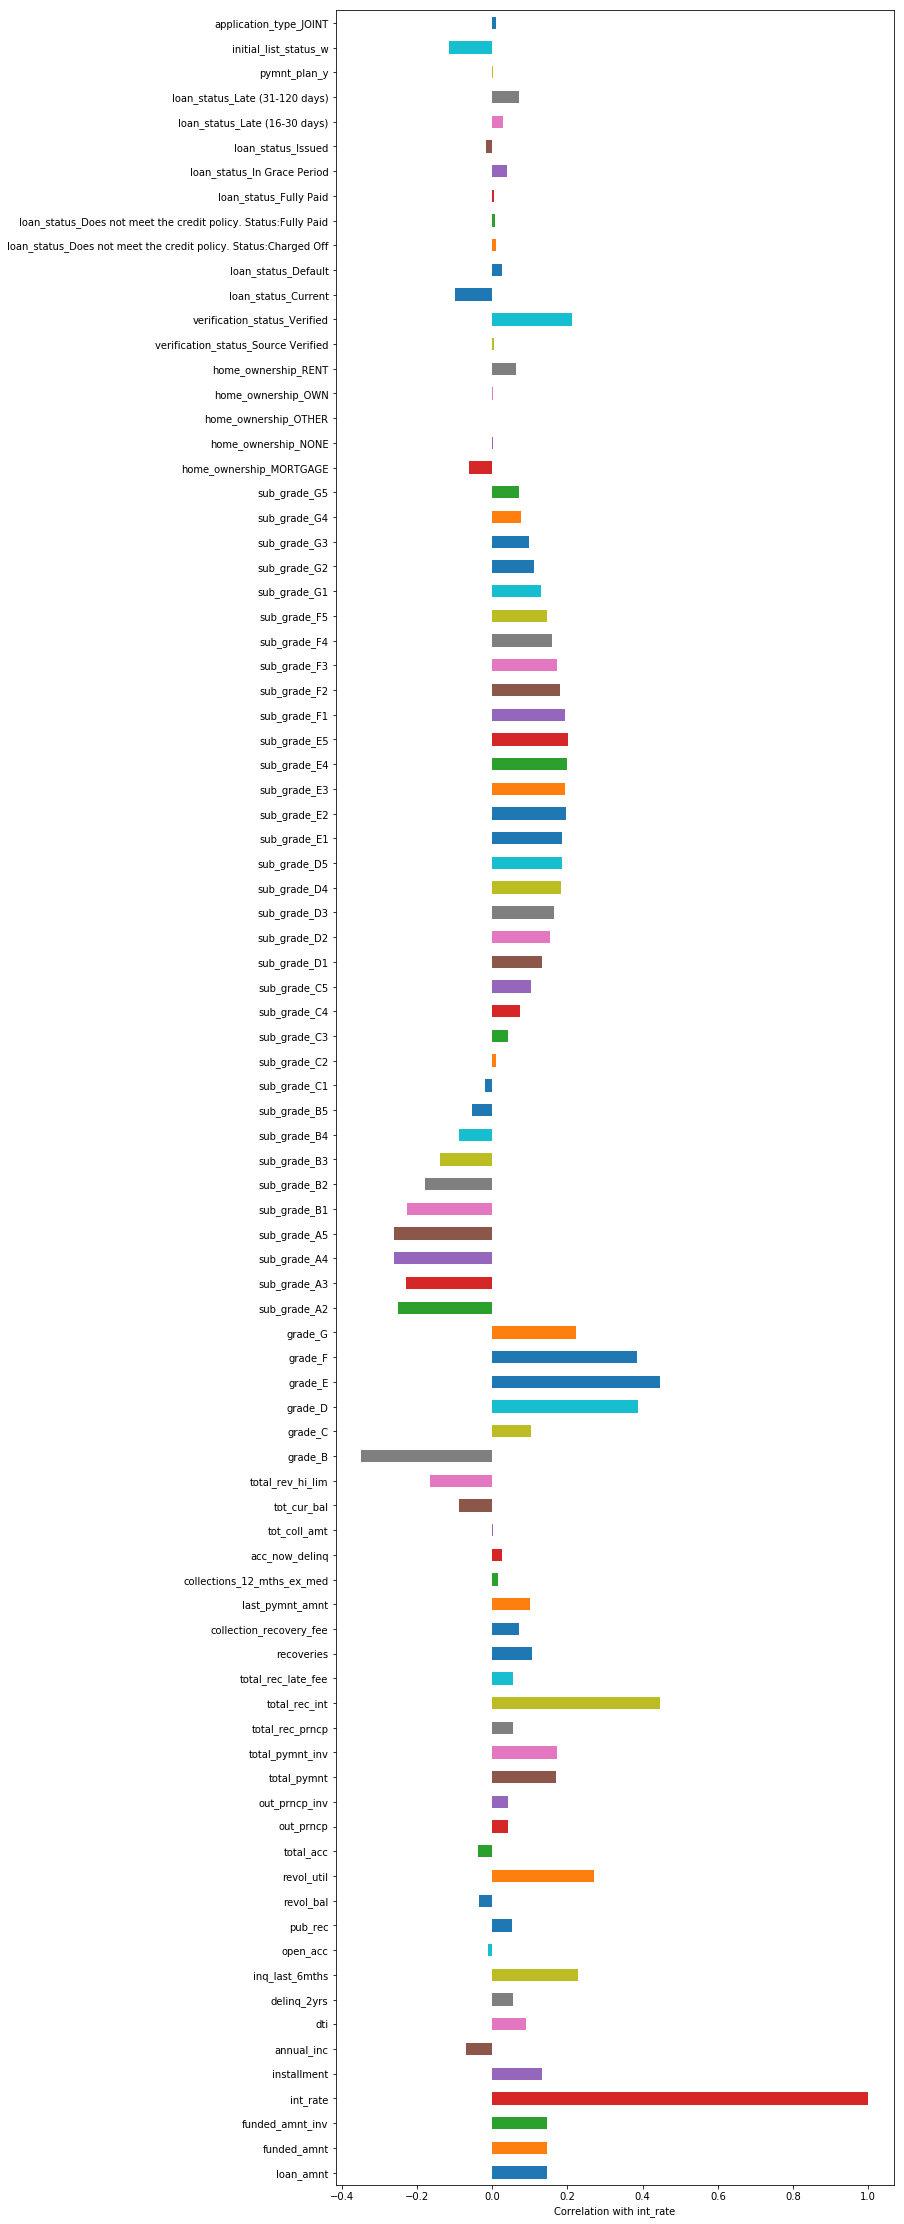

In [21]:
ax = Train.corr()['int_rate'].plot(kind = "barh",figsize = (10,40))
ax.set_xlabel('Correlation with int_rate')

# Task 3: 
## Neural Network (Prediction)

In [22]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,...,loan_status_Does not meet the credit policy. Status:Charged Off,loan_status_Does not meet the credit policy. Status:Fully Paid,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Issued,loan_status_Late (16-30 days),loan_status_Late (31-120 days),pymnt_plan_y,initial_list_status_w,application_type_JOINT
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,10+ years,24000.0,Dec-2011,27.65,...,0,0,1,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,< 1 year,30000.0,Dec-2011,1.00,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,10+ years,12252.0,Dec-2011,8.72,...,0,0,1,0,0,0,0,0,0,0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,10+ years,49200.0,Dec-2011,20.00,...,0,0,1,0,0,0,0,0,0,0
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,1 year,80000.0,Dec-2011,17.94,...,0,0,0,0,0,0,0,0,0,0


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# We have imported all dependencies
new_df=pd.DataFrame()
new_df = df[['grade_C','grade_D','grade_E',
        'grade_F','grade_G','total_rec_int',
        'total_pymnt_inv','funded_amnt_inv','sub_grade_B5',
        'sub_grade_B4','sub_grade_C5','sub_grade_C4','sub_grade_C3','sub_grade_D5','int_rate']]





fullData = new_df

target_col = ["int_rate"]
cat_cols= []
num_cols= list(set(list(fullData.columns))-set(cat_cols)-set(target_col))
num_cat_cols = num_cols+cat_cols

In [24]:
for var in num_cat_cols:
    if fullData[var].isnull().any()==True:
        fullData[var+'_NA']=fullData[var].isnull()*1
#Impute numerical missing values with mean
fullData[num_cols] = fullData[num_cols].fillna(fullData[num_cols].mean())
#Impute categorical missing values with -9999
fullData[cat_cols] = fullData[cat_cols].fillna(value = -9999)
for var in cat_cols:
    number = LabelEncoder()
    fullData[var] = number.fit_transform(fullData[var].astype('str'))

features = list(set(list(fullData.columns))-set(target_col))
print(fullData[features].max())

fullData[features] = fullData[features]/fullData[features].max()
fullData[features]

sub_grade_C3           1.00
grade_G                1.00
total_rec_int      24205.62
sub_grade_C5           1.00
grade_D                1.00
grade_C                1.00
sub_grade_C4           1.00
funded_amnt_inv    35000.00
total_pymnt_inv    57777.58
sub_grade_B4           1.00
sub_grade_B5           1.00
sub_grade_D5           1.00
grade_F                1.00
grade_E                1.00
dtype: float64


,sub_grade_C3,grade_G,total_rec_int,sub_grade_C5,grade_D,grade_C,sub_grade_C4,funded_amnt_inv,total_pymnt_inv,sub_grade_B4,sub_grade_B5,sub_grade_D5,grade_F,grade_E
0,0.0,0.0,0.035573,0.0,0.0,0.0,0.0,0.142143,0.100935,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.017978,0.0,0.0,1.0,1.0,0.071429,0.017459,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.024938,1.0,0.0,1.0,0.0,0.068571,0.051986,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.091273,0.0,0.0,1.0,0.0,0.285714,0.211610,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.041687,0.0,0.0,0.0,0.0,0.085714,0.056115,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.026084,0.0,0.0,0.0,0.0,0.142857,0.097467,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.125012,1.0,0.0,1.0,0.0,0.200000,0.140830,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.038757,0.0,0.0,0.0,0.0,0.085714,0.068160,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.012185,0.0,0.0,0.0,0.0,0.160000,0.011181,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.022037,0.0,0.0,0.0,0.0,0.152857,0.025431,0.0,1.0,0.0,0.0,0.0


In [25]:
features=list(set(list(fullData.columns))-set(target_col))
X = fullData[features].values
y = fullData[target_col].values
X_train, X_valid, y_train,y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

## Model

In [26]:
from keras.models import Sequential
from keras.layers import Activation, Dense,Dropout
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from math import fabs


cvscores =[]

model = Sequential()
model.add(Dense(50, input_dim=14, activation= "relu"))
model.add(Dense(25, activation= "relu"))
model.add(Dense(1, activation= "relu"))
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train,batch_size=50, epochs=5,verbose=2)
pred= model.predict(X_valid)
mape=np.mean(np.abs((y_valid-pred) / y_valid)) * 100
print("Test Mape :"+str(mape))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 17s - loss: 2.5140 - mean_squared_error: 2.5140
Epoch 2/5
 - 16s - loss: 1.2092 - mean_squared_error: 1.2092
Epoch 3/5
 - 15s - loss: 1.1573 - mean_squared_error: 1.1573
Epoch 4/5
 - 15s - loss: 1.0795 - mean_squared_error: 1.0795
Epoch 5/5
 - 16s - loss: 1.0280 - mean_squared_error: 1.0280
Test Mape :6.329716228706925


### 5 fold Cross Validation 

In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [28]:
from keras.models import Sequential
from keras.layers import Activation, Dense,Dropout
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from math import fabs
import matplotlib.pyplot as plt

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cvscores =[]

for train_index, test_index in kfold.split(X,y):
    X_trainD, X_testD = X[train_index], X[test_index]
    y_trainD, y_testD = y[train_index], y[test_index]
    model = Sequential()
    model.add(Dense(50, input_dim=14, activation= "relu"))
    model.add(Dense(25, activation= "relu"))
    model.add(Dense(1, activation= "relu"))
    model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
    model.fit(X_trainD, y_trainD,batch_size=50, epochs=10)
    pred= model.predict(X_valid)
    mape=np.mean(np.abs((y_valid-pred) / y_valid)) * 100
    cvscores.append(mape)

Epoch 1/10


315700/709682 [============>.................] - ETA: 1:24:08 - loss: 53125.0352 - mean_squared_error: 53125.035 - ETA: 2:10 - loss: 57990.2312 - mean_squared_error: 57990.2312  - ETA: 1:12 - loss: 56869.3842 - mean_squared_error: 56869.38 - ETA: 55s - loss: 55758.8955 - mean_squared_error: 55758.8955 - ETA: 46s - loss: 53714.0172 - mean_squared_error: 53714.017 - ETA: 40s - loss: 49826.4605 - mean_squared_error: 49826.460 - ETA: 36s - loss: 44721.7389 - mean_squared_error: 44721.738 - ETA: 33s - loss: 40254.1539 - mean_squared_error: 40254.153 - ETA: 31s - loss: 36682.4303 - mean_squared_error: 36682.430 - ETA: 29s - loss: 33944.0991 - mean_squared_error: 33944.099 - ETA: 28s - loss: 31469.3633 - mean_squared_error: 31469.363 - ETA: 26s - loss: 29172.8432 - mean_squared_error: 29172.843 - ETA: 25s - loss: 27282.0364 - mean_squared_error: 27282.036 - ETA: 24s - loss: 25524.8141 - mean_squared_error: 25524.814 - ETA: 23s - loss: 23967.5763 - mean_squared_error: 23967.576 - ETA: 23s - lo

320150/709682 [============>.................] - ETA: 8:02 - loss: 1079.5953 - mean_squared_error: 1079.59 - ETA: 26s - loss: 1019.8091 - mean_squared_error: 1019.8091 - ETA: 20s - loss: 1016.1433 - mean_squared_error: 1016.143 - ETA: 19s - loss: 997.4472 - mean_squared_error: 997.4472  - ETA: 17s - loss: 1010.0795 - mean_squared_error: 1010.079 - ETA: 17s - loss: 1005.3489 - mean_squared_error: 1005.348 - ETA: 17s - loss: 1007.9331 - mean_squared_error: 1007.933 - ETA: 17s - loss: 1008.3160 - mean_squared_error: 1008.316 - ETA: 17s - loss: 1012.4704 - mean_squared_error: 1012.470 - ETA: 17s - loss: 1021.6258 - mean_squared_error: 1021.625 - ETA: 16s - loss: 1021.9898 - mean_squared_error: 1021.989 - ETA: 16s - loss: 1017.0693 - mean_squared_error: 1017.069 - ETA: 16s - loss: 1017.4481 - mean_squared_error: 1017.448 - ETA: 16s - loss: 1015.1046 - mean_squared_error: 1015.104 - ETA: 16s - loss: 1013.9695 - mean_squared_error: 1013.969 - ETA: 15s - loss: 1012.4492 - mean_squared_error: 1

709682/709682 [==============================] - ETA: 1s - loss: 970.3204 - mean_squared_error: 970.32 - ETA: 1s - loss: 970.2724 - mean_squared_error: 970.27 - ETA: 0s - loss: 970.1136 - mean_squared_error: 970.11 - ETA: 0s - loss: 969.6794 - mean_squared_error: 969.67 - ETA: 0s - loss: 969.4744 - mean_squared_error: 969.47 - ETA: 0s - loss: 969.2903 - mean_squared_error: 969.29 - ETA: 0s - loss: 969.0341 - mean_squared_error: 969.03 - ETA: 0s - loss: 968.8134 - mean_squared_error: 968.81 - ETA: 0s - loss: 968.5961 - mean_squared_error: 968.59 - ETA: 0s - loss: 968.1064 - mean_squared_error: 968.10 - ETA: 0s - loss: 968.0972 - mean_squared_error: 968.09 - ETA: 0s - loss: 967.8128 - mean_squared_error: 967.81 - ETA: 0s - loss: 967.4769 - mean_squared_error: 967.47 - ETA: 0s - loss: 967.3535 - mean_squared_error: 967.35 - ETA: 0s - loss: 967.0281 - mean_squared_error: 967.02 - ETA: 0s - loss: 966.7107 - mean_squared_error: 966.71 - ETA: 0s - loss: 966.3229 - mean_squared_error: 966.32 -

332500/709682 [=============>................] - ETA: 7:34 - loss: 554.5845 - mean_squared_error: 554.58 - ETA: 27s - loss: 911.0549 - mean_squared_error: 911.0549 - ETA: 21s - loss: 924.9555 - mean_squared_error: 924.955 - ETA: 20s - loss: 907.3121 - mean_squared_error: 907.312 - ETA: 19s - loss: 925.7528 - mean_squared_error: 925.752 - ETA: 18s - loss: 908.0267 - mean_squared_error: 908.026 - ETA: 18s - loss: 902.2849 - mean_squared_error: 902.284 - ETA: 18s - loss: 900.2552 - mean_squared_error: 900.255 - ETA: 17s - loss: 893.4880 - mean_squared_error: 893.488 - ETA: 17s - loss: 895.5925 - mean_squared_error: 895.592 - ETA: 17s - loss: 899.2684 - mean_squared_error: 899.268 - ETA: 17s - loss: 903.8822 - mean_squared_error: 903.882 - ETA: 16s - loss: 901.3035 - mean_squared_error: 901.303 - ETA: 16s - loss: 903.4508 - mean_squared_error: 903.450 - ETA: 16s - loss: 898.1702 - mean_squared_error: 898.170 - ETA: 16s - loss: 891.4708 - mean_squared_error: 891.470 - ETA: 16s - loss: 895.9

334900/709682 [=============>................] - ETA: 8:02 - loss: 1303.3344 - mean_squared_error: 1303.33 - ETA: 27s - loss: 813.0499 - mean_squared_error: 813.0499   - ETA: 22s - loss: 808.2200 - mean_squared_error: 808.220 - ETA: 20s - loss: 824.3375 - mean_squared_error: 824.337 - ETA: 19s - loss: 822.3734 - mean_squared_error: 822.373 - ETA: 18s - loss: 828.8307 - mean_squared_error: 828.830 - ETA: 18s - loss: 828.5389 - mean_squared_error: 828.538 - ETA: 17s - loss: 835.7221 - mean_squared_error: 835.722 - ETA: 17s - loss: 841.7126 - mean_squared_error: 841.712 - ETA: 17s - loss: 831.8965 - mean_squared_error: 831.896 - ETA: 17s - loss: 844.3164 - mean_squared_error: 844.316 - ETA: 16s - loss: 841.4993 - mean_squared_error: 841.499 - ETA: 16s - loss: 847.6468 - mean_squared_error: 847.646 - ETA: 16s - loss: 846.3104 - mean_squared_error: 846.310 - ETA: 16s - loss: 839.9244 - mean_squared_error: 839.924 - ETA: 16s - loss: 840.9828 - mean_squared_error: 840.982 - ETA: 16s - loss: 8

709682/709682 [==============================] - ETA: 0s - loss: 817.7687 - mean_squared_error: 817.76 - ETA: 0s - loss: 817.8893 - mean_squared_error: 817.88 - ETA: 0s - loss: 817.8328 - mean_squared_error: 817.83 - ETA: 0s - loss: 817.5800 - mean_squared_error: 817.58 - ETA: 0s - loss: 817.7171 - mean_squared_error: 817.71 - ETA: 0s - loss: 817.9378 - mean_squared_error: 817.93 - ETA: 0s - loss: 818.1944 - mean_squared_error: 818.19 - ETA: 0s - loss: 818.0020 - mean_squared_error: 818.00 - ETA: 0s - loss: 817.9755 - mean_squared_error: 817.97 - ETA: 0s - loss: 817.9765 - mean_squared_error: 817.97 - ETA: 0s - loss: 818.2749 - mean_squared_error: 818.27 - ETA: 0s - loss: 818.0031 - mean_squared_error: 818.00 - ETA: 0s - loss: 817.9892 - mean_squared_error: 817.98 - ETA: 0s - loss: 817.7838 - mean_squared_error: 817.78 - ETA: 0s - loss: 817.5952 - mean_squared_error: 817.59 - ETA: 0s - loss: 817.6592 - mean_squared_error: 817.65 - ETA: 0s - loss: 817.4339 - mean_squared_error: 817.43 -

334450/709682 [=============>................] - ETA: 8:09 - loss: 583.7676 - mean_squared_error: 583.76 - ETA: 28s - loss: 870.8642 - mean_squared_error: 870.8642 - ETA: 22s - loss: 801.6495 - mean_squared_error: 801.649 - ETA: 20s - loss: 794.0708 - mean_squared_error: 794.070 - ETA: 19s - loss: 802.3898 - mean_squared_error: 802.389 - ETA: 19s - loss: 812.6955 - mean_squared_error: 812.695 - ETA: 18s - loss: 805.7533 - mean_squared_error: 805.753 - ETA: 18s - loss: 806.7600 - mean_squared_error: 806.760 - ETA: 17s - loss: 816.4109 - mean_squared_error: 816.410 - ETA: 17s - loss: 812.6025 - mean_squared_error: 812.602 - ETA: 17s - loss: 807.4288 - mean_squared_error: 807.428 - ETA: 17s - loss: 804.9430 - mean_squared_error: 804.943 - ETA: 16s - loss: 800.5407 - mean_squared_error: 800.540 - ETA: 16s - loss: 802.7264 - mean_squared_error: 802.726 - ETA: 16s - loss: 799.3579 - mean_squared_error: 799.357 - ETA: 16s - loss: 799.7627 - mean_squared_error: 799.762 - ETA: 16s - loss: 802.9

334300/709682 [=============>................] - ETA: 8:02 - loss: 395.8611 - mean_squared_error: 395.86 - ETA: 25s - loss: 731.7157 - mean_squared_error: 731.7157 - ETA: 21s - loss: 757.1187 - mean_squared_error: 757.118 - ETA: 19s - loss: 782.5823 - mean_squared_error: 782.582 - ETA: 19s - loss: 771.7267 - mean_squared_error: 771.726 - ETA: 18s - loss: 771.3864 - mean_squared_error: 771.386 - ETA: 18s - loss: 778.6326 - mean_squared_error: 778.632 - ETA: 17s - loss: 790.9365 - mean_squared_error: 790.936 - ETA: 17s - loss: 796.1905 - mean_squared_error: 796.190 - ETA: 17s - loss: 801.2473 - mean_squared_error: 801.247 - ETA: 17s - loss: 796.9578 - mean_squared_error: 796.957 - ETA: 16s - loss: 798.4776 - mean_squared_error: 798.477 - ETA: 16s - loss: 800.0351 - mean_squared_error: 800.035 - ETA: 16s - loss: 798.4469 - mean_squared_error: 798.446 - ETA: 16s - loss: 793.8910 - mean_squared_error: 793.891 - ETA: 16s - loss: 792.3973 - mean_squared_error: 792.397 - ETA: 16s - loss: 791.6

709682/709682 [==============================] - ETA: 0s - loss: 780.5341 - mean_squared_error: 780.53 - ETA: 0s - loss: 780.3455 - mean_squared_error: 780.34 - ETA: 0s - loss: 780.1736 - mean_squared_error: 780.17 - ETA: 0s - loss: 780.1629 - mean_squared_error: 780.16 - ETA: 0s - loss: 780.1304 - mean_squared_error: 780.13 - ETA: 0s - loss: 780.0332 - mean_squared_error: 780.03 - ETA: 0s - loss: 780.0526 - mean_squared_error: 780.05 - ETA: 0s - loss: 780.1442 - mean_squared_error: 780.14 - ETA: 0s - loss: 780.2293 - mean_squared_error: 780.22 - ETA: 0s - loss: 780.1459 - mean_squared_error: 780.14 - ETA: 0s - loss: 780.0797 - mean_squared_error: 780.07 - ETA: 0s - loss: 780.1969 - mean_squared_error: 780.19 - ETA: 0s - loss: 780.1748 - mean_squared_error: 780.17 - ETA: 0s - loss: 780.2482 - mean_squared_error: 780.24 - ETA: 0s - loss: 780.3882 - mean_squared_error: 780.38 - ETA: 0s - loss: 780.6098 - mean_squared_error: 780.60 - ETA: 0s - loss: 780.7911 - mean_squared_error: 780.79 -

334550/709682 [=============>................] - ETA: 7:50 - loss: 717.2045 - mean_squared_error: 717.20 - ETA: 26s - loss: 730.7007 - mean_squared_error: 730.7007 - ETA: 21s - loss: 730.6943 - mean_squared_error: 730.694 - ETA: 19s - loss: 730.0677 - mean_squared_error: 730.067 - ETA: 18s - loss: 731.5375 - mean_squared_error: 731.537 - ETA: 18s - loss: 750.9699 - mean_squared_error: 750.969 - ETA: 18s - loss: 762.0828 - mean_squared_error: 762.082 - ETA: 17s - loss: 757.1044 - mean_squared_error: 757.104 - ETA: 17s - loss: 767.2431 - mean_squared_error: 767.243 - ETA: 17s - loss: 758.3862 - mean_squared_error: 758.386 - ETA: 16s - loss: 757.9835 - mean_squared_error: 757.983 - ETA: 16s - loss: 761.6242 - mean_squared_error: 761.624 - ETA: 16s - loss: 763.1627 - mean_squared_error: 763.162 - ETA: 16s - loss: 766.8524 - mean_squared_error: 766.852 - ETA: 16s - loss: 767.4371 - mean_squared_error: 767.437 - ETA: 16s - loss: 769.7890 - mean_squared_error: 769.789 - ETA: 16s - loss: 766.0

333300/709682 [=============>................] - ETA: 8:16 - loss: 470.2340 - mean_squared_error: 470.23 - ETA: 27s - loss: 819.3574 - mean_squared_error: 819.3574 - ETA: 22s - loss: 776.0836 - mean_squared_error: 776.083 - ETA: 20s - loss: 772.1454 - mean_squared_error: 772.145 - ETA: 19s - loss: 779.0416 - mean_squared_error: 779.041 - ETA: 18s - loss: 772.2892 - mean_squared_error: 772.289 - ETA: 18s - loss: 779.6378 - mean_squared_error: 779.637 - ETA: 18s - loss: 774.2663 - mean_squared_error: 774.266 - ETA: 17s - loss: 764.3939 - mean_squared_error: 764.393 - ETA: 17s - loss: 767.8896 - mean_squared_error: 767.889 - ETA: 17s - loss: 772.0669 - mean_squared_error: 772.066 - ETA: 17s - loss: 775.7315 - mean_squared_error: 775.731 - ETA: 16s - loss: 780.8693 - mean_squared_error: 780.869 - ETA: 16s - loss: 778.7978 - mean_squared_error: 778.797 - ETA: 16s - loss: 778.6155 - mean_squared_error: 778.615 - ETA: 16s - loss: 782.6554 - mean_squared_error: 782.655 - ETA: 16s - loss: 777.6

709682/709682 [==============================] - ETA: 0s - loss: 758.4414 - mean_squared_error: 758.44 - ETA: 0s - loss: 758.3898 - mean_squared_error: 758.38 - ETA: 0s - loss: 758.5611 - mean_squared_error: 758.56 - ETA: 0s - loss: 758.6953 - mean_squared_error: 758.69 - ETA: 0s - loss: 758.7609 - mean_squared_error: 758.76 - ETA: 0s - loss: 758.7809 - mean_squared_error: 758.78 - ETA: 0s - loss: 758.7914 - mean_squared_error: 758.79 - ETA: 0s - loss: 759.0890 - mean_squared_error: 759.08 - ETA: 0s - loss: 758.9905 - mean_squared_error: 758.99 - ETA: 0s - loss: 759.4556 - mean_squared_error: 759.45 - ETA: 0s - loss: 759.4992 - mean_squared_error: 759.49 - ETA: 0s - loss: 759.7068 - mean_squared_error: 759.70 - ETA: 0s - loss: 759.7453 - mean_squared_error: 759.74 - ETA: 0s - loss: 759.7008 - mean_squared_error: 759.70 - ETA: 0s - loss: 759.6230 - mean_squared_error: 759.62 - ETA: 0s - loss: 759.5219 - mean_squared_error: 759.52 - ETA: 0s - loss: 759.2618 - mean_squared_error: 759.26 -

335450/709682 [=============>................] - ETA: 8:14 - loss: 949.6118 - mean_squared_error: 949.61 - ETA: 25s - loss: 793.1895 - mean_squared_error: 793.1895 - ETA: 21s - loss: 755.4410 - mean_squared_error: 755.441 - ETA: 19s - loss: 754.6016 - mean_squared_error: 754.601 - ETA: 18s - loss: 746.3681 - mean_squared_error: 746.368 - ETA: 18s - loss: 752.5293 - mean_squared_error: 752.529 - ETA: 17s - loss: 751.0660 - mean_squared_error: 751.066 - ETA: 17s - loss: 757.5024 - mean_squared_error: 757.502 - ETA: 17s - loss: 750.1214 - mean_squared_error: 750.121 - ETA: 17s - loss: 767.5135 - mean_squared_error: 767.513 - ETA: 17s - loss: 759.8260 - mean_squared_error: 759.826 - ETA: 16s - loss: 765.2916 - mean_squared_error: 765.291 - ETA: 16s - loss: 765.3194 - mean_squared_error: 765.319 - ETA: 16s - loss: 765.2172 - mean_squared_error: 765.217 - ETA: 16s - loss: 761.9729 - mean_squared_error: 761.972 - ETA: 16s - loss: 763.0203 - mean_squared_error: 763.020 - ETA: 16s - loss: 761.3

334750/709682 [=============>................] - ETA: 7:34 - loss: 686.6373 - mean_squared_error: 686.63 - ETA: 25s - loss: 694.8712 - mean_squared_error: 694.8712 - ETA: 21s - loss: 694.3961 - mean_squared_error: 694.396 - ETA: 19s - loss: 706.6853 - mean_squared_error: 706.685 - ETA: 19s - loss: 702.5314 - mean_squared_error: 702.531 - ETA: 18s - loss: 699.4438 - mean_squared_error: 699.443 - ETA: 18s - loss: 709.5611 - mean_squared_error: 709.561 - ETA: 17s - loss: 718.1663 - mean_squared_error: 718.166 - ETA: 17s - loss: 724.6986 - mean_squared_error: 724.698 - ETA: 17s - loss: 721.2932 - mean_squared_error: 721.293 - ETA: 17s - loss: 716.8637 - mean_squared_error: 716.863 - ETA: 16s - loss: 719.9104 - mean_squared_error: 719.910 - ETA: 16s - loss: 723.2127 - mean_squared_error: 723.212 - ETA: 16s - loss: 725.5857 - mean_squared_error: 725.585 - ETA: 16s - loss: 724.1958 - mean_squared_error: 724.195 - ETA: 16s - loss: 721.6311 - mean_squared_error: 721.631 - ETA: 16s - loss: 724.1

709682/709682 [==============================] - ETA: 0s - loss: 728.6921 - mean_squared_error: 728.69 - ETA: 0s - loss: 728.5489 - mean_squared_error: 728.54 - ETA: 0s - loss: 728.4065 - mean_squared_error: 728.40 - ETA: 0s - loss: 728.3930 - mean_squared_error: 728.39 - ETA: 0s - loss: 728.2504 - mean_squared_error: 728.25 - ETA: 0s - loss: 728.1614 - mean_squared_error: 728.16 - ETA: 0s - loss: 728.0487 - mean_squared_error: 728.04 - ETA: 0s - loss: 727.9205 - mean_squared_error: 727.92 - ETA: 0s - loss: 727.9076 - mean_squared_error: 727.90 - ETA: 0s - loss: 728.0669 - mean_squared_error: 728.06 - ETA: 0s - loss: 727.9242 - mean_squared_error: 727.92 - ETA: 0s - loss: 728.0891 - mean_squared_error: 728.08 - ETA: 0s - loss: 727.9668 - mean_squared_error: 727.96 - ETA: 0s - loss: 727.8392 - mean_squared_error: 727.83 - ETA: 0s - loss: 727.7977 - mean_squared_error: 727.79 - ETA: 0s - loss: 727.6571 - mean_squared_error: 727.65 - ETA: 0s - loss: 727.3629 - mean_squared_error: 727.36 -

305400/709816 [===========>..................] - ETA: 1:33:01 - loss: 56426.6133 - mean_squared_error: 56426.613 - ETA: 2:26 - loss: 60496.5030 - mean_squared_error: 60496.5030  - ETA: 1:25 - loss: 59099.3019 - mean_squared_error: 59099.30 - ETA: 1:02 - loss: 58963.5145 - mean_squared_error: 58963.51 - ETA: 50s - loss: 56299.5767 - mean_squared_error: 56299.5767 - ETA: 43s - loss: 52384.2233 - mean_squared_error: 52384.223 - ETA: 39s - loss: 47414.1156 - mean_squared_error: 47414.115 - ETA: 36s - loss: 43302.6048 - mean_squared_error: 43302.604 - ETA: 33s - loss: 39447.0857 - mean_squared_error: 39447.085 - ETA: 31s - loss: 36085.9787 - mean_squared_error: 36085.978 - ETA: 30s - loss: 33555.7835 - mean_squared_error: 33555.783 - ETA: 29s - loss: 31366.9380 - mean_squared_error: 31366.938 - ETA: 27s - loss: 29386.6725 - mean_squared_error: 29386.672 - ETA: 26s - loss: 27652.3720 - mean_squared_error: 27652.372 - ETA: 26s - loss: 26110.1692 - mean_squared_error: 26110.169 - ETA: 25s - lo

320050/709816 [============>.................] - ETA: 8:29 - loss: 2249.4124 - mean_squared_error: 2249.41 - ETA: 28s - loss: 1132.7436 - mean_squared_error: 1132.7436 - ETA: 22s - loss: 1105.5172 - mean_squared_error: 1105.517 - ETA: 20s - loss: 1074.9643 - mean_squared_error: 1074.964 - ETA: 19s - loss: 1073.9502 - mean_squared_error: 1073.950 - ETA: 19s - loss: 1058.5820 - mean_squared_error: 1058.582 - ETA: 19s - loss: 1056.1177 - mean_squared_error: 1056.117 - ETA: 18s - loss: 1055.3542 - mean_squared_error: 1055.354 - ETA: 18s - loss: 1051.2394 - mean_squared_error: 1051.239 - ETA: 18s - loss: 1043.8445 - mean_squared_error: 1043.844 - ETA: 17s - loss: 1042.4282 - mean_squared_error: 1042.428 - ETA: 17s - loss: 1031.0086 - mean_squared_error: 1031.008 - ETA: 17s - loss: 1028.1756 - mean_squared_error: 1028.175 - ETA: 16s - loss: 1030.0205 - mean_squared_error: 1030.020 - ETA: 16s - loss: 1035.2799 - mean_squared_error: 1035.279 - ETA: 16s - loss: 1038.4897 - mean_squared_error: 1

709816/709816 [==============================] - ETA: 1s - loss: 1005.8332 - mean_squared_error: 1005.83 - ETA: 1s - loss: 1005.7240 - mean_squared_error: 1005.72 - ETA: 1s - loss: 1005.6158 - mean_squared_error: 1005.61 - ETA: 1s - loss: 1005.4258 - mean_squared_error: 1005.42 - ETA: 1s - loss: 1005.0137 - mean_squared_error: 1005.01 - ETA: 1s - loss: 1004.6724 - mean_squared_error: 1004.67 - ETA: 1s - loss: 1004.2905 - mean_squared_error: 1004.29 - ETA: 1s - loss: 1004.4271 - mean_squared_error: 1004.42 - ETA: 1s - loss: 1004.3712 - mean_squared_error: 1004.37 - ETA: 1s - loss: 1004.4032 - mean_squared_error: 1004.40 - ETA: 1s - loss: 1004.4048 - mean_squared_error: 1004.40 - ETA: 1s - loss: 1004.1893 - mean_squared_error: 1004.18 - ETA: 0s - loss: 1004.0570 - mean_squared_error: 1004.05 - ETA: 0s - loss: 1004.0998 - mean_squared_error: 1004.09 - ETA: 0s - loss: 1003.8706 - mean_squared_error: 1003.87 - ETA: 0s - loss: 1003.5754 - mean_squared_error: 1003.57 - ETA: 0s - loss: 1003.55

331100/709816 [============>.................] - ETA: 8:45 - loss: 1067.0125 - mean_squared_error: 1067.01 - ETA: 30s - loss: 911.6167 - mean_squared_error: 911.6167   - ETA: 23s - loss: 915.2348 - mean_squared_error: 915.234 - ETA: 21s - loss: 949.4155 - mean_squared_error: 949.415 - ETA: 19s - loss: 944.1485 - mean_squared_error: 944.148 - ETA: 18s - loss: 946.6439 - mean_squared_error: 946.643 - ETA: 18s - loss: 940.1584 - mean_squared_error: 940.158 - ETA: 18s - loss: 946.7424 - mean_squared_error: 946.742 - ETA: 17s - loss: 948.1807 - mean_squared_error: 948.180 - ETA: 17s - loss: 945.1552 - mean_squared_error: 945.155 - ETA: 17s - loss: 938.2623 - mean_squared_error: 938.262 - ETA: 17s - loss: 936.7610 - mean_squared_error: 936.761 - ETA: 17s - loss: 934.4184 - mean_squared_error: 934.418 - ETA: 16s - loss: 934.4223 - mean_squared_error: 934.422 - ETA: 16s - loss: 935.4119 - mean_squared_error: 935.411 - ETA: 16s - loss: 935.9039 - mean_squared_error: 935.903 - ETA: 16s - loss: 9

294450/709816 [===========>..................] - ETA: 8:17 - loss: 643.5933 - mean_squared_error: 643.59 - ETA: 33s - loss: 839.2088 - mean_squared_error: 839.2088 - ETA: 27s - loss: 852.8733 - mean_squared_error: 852.873 - ETA: 24s - loss: 829.0173 - mean_squared_error: 829.017 - ETA: 22s - loss: 823.4688 - mean_squared_error: 823.468 - ETA: 20s - loss: 834.3602 - mean_squared_error: 834.360 - ETA: 20s - loss: 830.4154 - mean_squared_error: 830.415 - ETA: 20s - loss: 840.9014 - mean_squared_error: 840.901 - ETA: 20s - loss: 827.1354 - mean_squared_error: 827.135 - ETA: 20s - loss: 827.4351 - mean_squared_error: 827.435 - ETA: 20s - loss: 825.3231 - mean_squared_error: 825.323 - ETA: 19s - loss: 825.8133 - mean_squared_error: 825.813 - ETA: 19s - loss: 825.0019 - mean_squared_error: 825.001 - ETA: 19s - loss: 827.4265 - mean_squared_error: 827.426 - ETA: 19s - loss: 831.9934 - mean_squared_error: 831.993 - ETA: 19s - loss: 832.8745 - mean_squared_error: 832.874 - ETA: 19s - loss: 832.8

709816/709816 [==============================] - ETA: 2s - loss: 800.4270 - mean_squared_error: 800.42 - ETA: 2s - loss: 800.2769 - mean_squared_error: 800.27 - ETA: 2s - loss: 800.1701 - mean_squared_error: 800.17 - ETA: 2s - loss: 800.1443 - mean_squared_error: 800.14 - ETA: 2s - loss: 800.0626 - mean_squared_error: 800.06 - ETA: 2s - loss: 799.9385 - mean_squared_error: 799.93 - ETA: 2s - loss: 799.7974 - mean_squared_error: 799.79 - ETA: 2s - loss: 800.3090 - mean_squared_error: 800.30 - ETA: 2s - loss: 800.2087 - mean_squared_error: 800.20 - ETA: 2s - loss: 799.7305 - mean_squared_error: 799.73 - ETA: 2s - loss: 799.4919 - mean_squared_error: 799.49 - ETA: 2s - loss: 799.5228 - mean_squared_error: 799.52 - ETA: 2s - loss: 799.4208 - mean_squared_error: 799.42 - ETA: 2s - loss: 799.1221 - mean_squared_error: 799.12 - ETA: 1s - loss: 799.3210 - mean_squared_error: 799.32 - ETA: 1s - loss: 799.1265 - mean_squared_error: 799.12 - ETA: 1s - loss: 798.9150 - mean_squared_error: 798.91 -

292600/709816 [===========>..................] - ETA: 7:49 - loss: 947.7452 - mean_squared_error: 947.74 - ETA: 29s - loss: 795.6901 - mean_squared_error: 795.6901 - ETA: 24s - loss: 779.8819 - mean_squared_error: 779.881 - ETA: 22s - loss: 746.9310 - mean_squared_error: 746.931 - ETA: 21s - loss: 760.9803 - mean_squared_error: 760.980 - ETA: 19s - loss: 767.9716 - mean_squared_error: 767.971 - ETA: 18s - loss: 758.5497 - mean_squared_error: 758.549 - ETA: 18s - loss: 748.6159 - mean_squared_error: 748.615 - ETA: 18s - loss: 745.3573 - mean_squared_error: 745.357 - ETA: 18s - loss: 736.8278 - mean_squared_error: 736.827 - ETA: 19s - loss: 732.3403 - mean_squared_error: 732.340 - ETA: 21s - loss: 736.5569 - mean_squared_error: 736.556 - ETA: 21s - loss: 742.7257 - mean_squared_error: 742.725 - ETA: 21s - loss: 748.9932 - mean_squared_error: 748.993 - ETA: 21s - loss: 752.0832 - mean_squared_error: 752.083 - ETA: 21s - loss: 752.9884 - mean_squared_error: 752.988 - ETA: 21s - loss: 751.3

297450/709816 [===========>..................] - ETA: 7:21 - loss: 677.9894 - mean_squared_error: 677.98 - ETA: 26s - loss: 786.7319 - mean_squared_error: 786.7319 - ETA: 23s - loss: 807.4810 - mean_squared_error: 807.481 - ETA: 21s - loss: 783.3905 - mean_squared_error: 783.390 - ETA: 20s - loss: 787.1498 - mean_squared_error: 787.149 - ETA: 19s - loss: 770.9871 - mean_squared_error: 770.987 - ETA: 18s - loss: 762.4482 - mean_squared_error: 762.448 - ETA: 18s - loss: 748.9194 - mean_squared_error: 748.919 - ETA: 18s - loss: 750.1978 - mean_squared_error: 750.197 - ETA: 17s - loss: 749.0612 - mean_squared_error: 749.061 - ETA: 17s - loss: 747.6112 - mean_squared_error: 747.611 - ETA: 17s - loss: 739.4635 - mean_squared_error: 739.463 - ETA: 17s - loss: 743.0931 - mean_squared_error: 743.093 - ETA: 16s - loss: 746.4086 - mean_squared_error: 746.408 - ETA: 16s - loss: 745.7337 - mean_squared_error: 745.733 - ETA: 16s - loss: 744.0233 - mean_squared_error: 744.023 - ETA: 16s - loss: 744.6

709816/709816 [==============================] - ETA: 2s - loss: 732.9774 - mean_squared_error: 732.97 - ETA: 2s - loss: 732.9112 - mean_squared_error: 732.91 - ETA: 2s - loss: 732.9292 - mean_squared_error: 732.92 - ETA: 2s - loss: 732.7807 - mean_squared_error: 732.78 - ETA: 1s - loss: 732.6643 - mean_squared_error: 732.66 - ETA: 1s - loss: 732.6298 - mean_squared_error: 732.62 - ETA: 1s - loss: 732.6100 - mean_squared_error: 732.61 - ETA: 1s - loss: 732.5554 - mean_squared_error: 732.55 - ETA: 1s - loss: 732.7035 - mean_squared_error: 732.70 - ETA: 1s - loss: 732.7353 - mean_squared_error: 732.73 - ETA: 1s - loss: 732.7325 - mean_squared_error: 732.73 - ETA: 1s - loss: 732.6495 - mean_squared_error: 732.64 - ETA: 1s - loss: 732.7714 - mean_squared_error: 732.77 - ETA: 1s - loss: 732.6254 - mean_squared_error: 732.62 - ETA: 1s - loss: 732.6998 - mean_squared_error: 732.69 - ETA: 1s - loss: 732.9434 - mean_squared_error: 732.94 - ETA: 1s - loss: 732.8696 - mean_squared_error: 732.86 -

304150/709816 [===========>..................] - ETA: 8:02 - loss: 1154.7832 - mean_squared_error: 1154.78 - ETA: 28s - loss: 764.2110 - mean_squared_error: 764.2110   - ETA: 22s - loss: 747.3542 - mean_squared_error: 747.354 - ETA: 20s - loss: 723.0149 - mean_squared_error: 723.014 - ETA: 19s - loss: 728.3505 - mean_squared_error: 728.350 - ETA: 18s - loss: 746.2494 - mean_squared_error: 746.249 - ETA: 17s - loss: 763.8403 - mean_squared_error: 763.840 - ETA: 17s - loss: 758.8646 - mean_squared_error: 758.864 - ETA: 17s - loss: 757.4309 - mean_squared_error: 757.430 - ETA: 16s - loss: 757.3694 - mean_squared_error: 757.369 - ETA: 17s - loss: 753.1087 - mean_squared_error: 753.108 - ETA: 16s - loss: 746.4604 - mean_squared_error: 746.460 - ETA: 16s - loss: 746.7822 - mean_squared_error: 746.782 - ETA: 16s - loss: 746.7293 - mean_squared_error: 746.729 - ETA: 16s - loss: 743.6531 - mean_squared_error: 743.653 - ETA: 16s - loss: 748.5297 - mean_squared_error: 748.529 - ETA: 16s - loss: 7

303650/709816 [===========>..................] - ETA: 8:04 - loss: 788.1178 - mean_squared_error: 788.11 - ETA: 27s - loss: 621.4936 - mean_squared_error: 621.4936 - ETA: 22s - loss: 708.3623 - mean_squared_error: 708.362 - ETA: 20s - loss: 722.8500 - mean_squared_error: 722.850 - ETA: 19s - loss: 724.4491 - mean_squared_error: 724.449 - ETA: 20s - loss: 723.1406 - mean_squared_error: 723.140 - ETA: 19s - loss: 714.8060 - mean_squared_error: 714.806 - ETA: 18s - loss: 713.9490 - mean_squared_error: 713.949 - ETA: 17s - loss: 714.1811 - mean_squared_error: 714.181 - ETA: 17s - loss: 716.3929 - mean_squared_error: 716.392 - ETA: 17s - loss: 720.9798 - mean_squared_error: 720.979 - ETA: 17s - loss: 731.7659 - mean_squared_error: 731.765 - ETA: 17s - loss: 729.6860 - mean_squared_error: 729.686 - ETA: 17s - loss: 731.8969 - mean_squared_error: 731.896 - ETA: 17s - loss: 728.8931 - mean_squared_error: 728.893 - ETA: 17s - loss: 724.4392 - mean_squared_error: 724.439 - ETA: 17s - loss: 723.2

709816/709816 [==============================] - ETA: 2s - loss: 714.6327 - mean_squared_error: 714.63 - ETA: 1s - loss: 714.9396 - mean_squared_error: 714.93 - ETA: 1s - loss: 715.3358 - mean_squared_error: 715.33 - ETA: 1s - loss: 715.1824 - mean_squared_error: 715.18 - ETA: 1s - loss: 715.3709 - mean_squared_error: 715.37 - ETA: 1s - loss: 715.2632 - mean_squared_error: 715.26 - ETA: 1s - loss: 715.1549 - mean_squared_error: 715.15 - ETA: 1s - loss: 715.2268 - mean_squared_error: 715.22 - ETA: 1s - loss: 715.3616 - mean_squared_error: 715.36 - ETA: 1s - loss: 715.2411 - mean_squared_error: 715.24 - ETA: 1s - loss: 714.9010 - mean_squared_error: 714.90 - ETA: 1s - loss: 715.1668 - mean_squared_error: 715.16 - ETA: 1s - loss: 715.0108 - mean_squared_error: 715.01 - ETA: 1s - loss: 715.0046 - mean_squared_error: 715.00 - ETA: 1s - loss: 715.1064 - mean_squared_error: 715.10 - ETA: 1s - loss: 714.9934 - mean_squared_error: 714.99 - ETA: 1s - loss: 714.9570 - mean_squared_error: 714.95 -

289950/709816 [===========>..................] - ETA: 7:33 - loss: 681.9656 - mean_squared_error: 681.96 - ETA: 29s - loss: 597.2889 - mean_squared_error: 597.2889 - ETA: 22s - loss: 702.9404 - mean_squared_error: 702.940 - ETA: 21s - loss: 680.9155 - mean_squared_error: 680.915 - ETA: 19s - loss: 701.3771 - mean_squared_error: 701.377 - ETA: 18s - loss: 709.7021 - mean_squared_error: 709.702 - ETA: 18s - loss: 706.1996 - mean_squared_error: 706.199 - ETA: 17s - loss: 712.1882 - mean_squared_error: 712.188 - ETA: 17s - loss: 703.8387 - mean_squared_error: 703.838 - ETA: 17s - loss: 707.3783 - mean_squared_error: 707.378 - ETA: 16s - loss: 709.9893 - mean_squared_error: 709.989 - ETA: 16s - loss: 699.4135 - mean_squared_error: 699.413 - ETA: 16s - loss: 701.3461 - mean_squared_error: 701.346 - ETA: 16s - loss: 702.3502 - mean_squared_error: 702.350 - ETA: 16s - loss: 711.5136 - mean_squared_error: 711.513 - ETA: 15s - loss: 710.2302 - mean_squared_error: 710.230 - ETA: 15s - loss: 713.6

305900/709816 [===========>..................] - ETA: 9:32 - loss: 378.9085 - mean_squared_error: 378.90 - ETA: 29s - loss: 683.6388 - mean_squared_error: 683.6388 - ETA: 23s - loss: 674.8654 - mean_squared_error: 674.865 - ETA: 21s - loss: 673.1108 - mean_squared_error: 673.110 - ETA: 20s - loss: 680.6660 - mean_squared_error: 680.666 - ETA: 20s - loss: 690.1309 - mean_squared_error: 690.130 - ETA: 20s - loss: 698.2308 - mean_squared_error: 698.230 - ETA: 19s - loss: 708.7966 - mean_squared_error: 708.796 - ETA: 18s - loss: 714.7744 - mean_squared_error: 714.774 - ETA: 18s - loss: 706.7821 - mean_squared_error: 706.782 - ETA: 18s - loss: 704.1742 - mean_squared_error: 704.174 - ETA: 18s - loss: 711.3988 - mean_squared_error: 711.398 - ETA: 17s - loss: 709.2086 - mean_squared_error: 709.208 - ETA: 17s - loss: 711.9712 - mean_squared_error: 711.971 - ETA: 17s - loss: 718.0759 - mean_squared_error: 718.075 - ETA: 17s - loss: 713.0891 - mean_squared_error: 713.089 - ETA: 17s - loss: 714.2

709816/709816 [==============================] - ETA: 1s - loss: 703.3983 - mean_squared_error: 703.39 - ETA: 1s - loss: 703.1875 - mean_squared_error: 703.18 - ETA: 1s - loss: 703.2240 - mean_squared_error: 703.22 - ETA: 1s - loss: 703.2979 - mean_squared_error: 703.29 - ETA: 1s - loss: 703.3845 - mean_squared_error: 703.38 - ETA: 1s - loss: 703.3993 - mean_squared_error: 703.39 - ETA: 1s - loss: 703.2458 - mean_squared_error: 703.24 - ETA: 1s - loss: 703.0060 - mean_squared_error: 703.00 - ETA: 1s - loss: 703.1398 - mean_squared_error: 703.13 - ETA: 1s - loss: 703.4884 - mean_squared_error: 703.48 - ETA: 1s - loss: 703.3409 - mean_squared_error: 703.34 - ETA: 1s - loss: 703.6148 - mean_squared_error: 703.61 - ETA: 1s - loss: 703.5540 - mean_squared_error: 703.55 - ETA: 0s - loss: 703.4354 - mean_squared_error: 703.43 - ETA: 0s - loss: 703.3703 - mean_squared_error: 703.37 - ETA: 0s - loss: 703.4663 - mean_squared_error: 703.46 - ETA: 0s - loss: 703.1468 - mean_squared_error: 703.14 -

304200/709915 [===========>..................] - ETA: 1:45:04 - loss: 59632.2305 - mean_squared_error: 59632.230 - ETA: 2:25 - loss: 59264.4735 - mean_squared_error: 59264.4735  - ETA: 1:26 - loss: 57690.1592 - mean_squared_error: 57690.15 - ETA: 1:01 - loss: 55814.7699 - mean_squared_error: 55814.76 - ETA: 49s - loss: 51415.7106 - mean_squared_error: 51415.7106 - ETA: 43s - loss: 46697.2842 - mean_squared_error: 46697.284 - ETA: 38s - loss: 41861.8968 - mean_squared_error: 41861.896 - ETA: 35s - loss: 37714.2166 - mean_squared_error: 37714.216 - ETA: 33s - loss: 34293.0168 - mean_squared_error: 34293.016 - ETA: 31s - loss: 31436.9787 - mean_squared_error: 31436.978 - ETA: 29s - loss: 28880.3733 - mean_squared_error: 28880.373 - ETA: 27s - loss: 26858.9252 - mean_squared_error: 26858.925 - ETA: 26s - loss: 25034.7860 - mean_squared_error: 25034.786 - ETA: 25s - loss: 23531.0470 - mean_squared_error: 23531.047 - ETA: 24s - loss: 22185.9139 - mean_squared_error: 22185.913 - ETA: 23s - lo

289900/709915 [===========>..................] - ETA: 7:35 - loss: 842.9877 - mean_squared_error: 842.98 - ETA: 28s - loss: 930.7307 - mean_squared_error: 930.7307 - ETA: 22s - loss: 899.5101 - mean_squared_error: 899.510 - ETA: 20s - loss: 914.1355 - mean_squared_error: 914.135 - ETA: 19s - loss: 938.7867 - mean_squared_error: 938.786 - ETA: 18s - loss: 928.2053 - mean_squared_error: 928.205 - ETA: 18s - loss: 909.8671 - mean_squared_error: 909.867 - ETA: 18s - loss: 927.1703 - mean_squared_error: 927.170 - ETA: 18s - loss: 932.5082 - mean_squared_error: 932.508 - ETA: 18s - loss: 937.6643 - mean_squared_error: 937.664 - ETA: 17s - loss: 929.9757 - mean_squared_error: 929.975 - ETA: 17s - loss: 928.5797 - mean_squared_error: 928.579 - ETA: 17s - loss: 936.8623 - mean_squared_error: 936.862 - ETA: 17s - loss: 938.5854 - mean_squared_error: 938.585 - ETA: 17s - loss: 937.7712 - mean_squared_error: 937.771 - ETA: 17s - loss: 939.7581 - mean_squared_error: 939.758 - ETA: 17s - loss: 941.9

709915/709915 [==============================] - ETA: 2s - loss: 936.4364 - mean_squared_error: 936.43 - ETA: 2s - loss: 936.2168 - mean_squared_error: 936.21 - ETA: 2s - loss: 936.3650 - mean_squared_error: 936.36 - ETA: 2s - loss: 936.4430 - mean_squared_error: 936.44 - ETA: 2s - loss: 936.3954 - mean_squared_error: 936.39 - ETA: 2s - loss: 936.6318 - mean_squared_error: 936.63 - ETA: 2s - loss: 936.2577 - mean_squared_error: 936.25 - ETA: 2s - loss: 935.9362 - mean_squared_error: 935.93 - ETA: 2s - loss: 935.6780 - mean_squared_error: 935.67 - ETA: 2s - loss: 935.6260 - mean_squared_error: 935.62 - ETA: 2s - loss: 935.8363 - mean_squared_error: 935.83 - ETA: 2s - loss: 936.1300 - mean_squared_error: 936.13 - ETA: 2s - loss: 936.1295 - mean_squared_error: 936.12 - ETA: 2s - loss: 935.9286 - mean_squared_error: 935.92 - ETA: 2s - loss: 935.5870 - mean_squared_error: 935.58 - ETA: 2s - loss: 935.5224 - mean_squared_error: 935.52 - ETA: 1s - loss: 935.6142 - mean_squared_error: 935.61 -

293150/709915 [===========>..................] - ETA: 8:42 - loss: 891.8162 - mean_squared_error: 891.81 - ETA: 30s - loss: 909.4626 - mean_squared_error: 909.4626 - ETA: 24s - loss: 921.5751 - mean_squared_error: 921.575 - ETA: 22s - loss: 944.9384 - mean_squared_error: 944.938 - ETA: 21s - loss: 932.3317 - mean_squared_error: 932.331 - ETA: 20s - loss: 924.4114 - mean_squared_error: 924.411 - ETA: 20s - loss: 922.4234 - mean_squared_error: 922.423 - ETA: 20s - loss: 923.8917 - mean_squared_error: 923.891 - ETA: 19s - loss: 926.4794 - mean_squared_error: 926.479 - ETA: 19s - loss: 922.9881 - mean_squared_error: 922.988 - ETA: 18s - loss: 919.6454 - mean_squared_error: 919.645 - ETA: 18s - loss: 915.5991 - mean_squared_error: 915.599 - ETA: 18s - loss: 917.7719 - mean_squared_error: 917.771 - ETA: 18s - loss: 912.1432 - mean_squared_error: 912.143 - ETA: 18s - loss: 918.8301 - mean_squared_error: 918.830 - ETA: 17s - loss: 916.0558 - mean_squared_error: 916.055 - ETA: 17s - loss: 915.5

294650/709915 [===========>..................] - ETA: 8:19 - loss: 631.7781 - mean_squared_error: 631.77 - ETA: 30s - loss: 867.5128 - mean_squared_error: 867.5128 - ETA: 23s - loss: 865.0701 - mean_squared_error: 865.070 - ETA: 21s - loss: 893.5209 - mean_squared_error: 893.520 - ETA: 19s - loss: 887.1940 - mean_squared_error: 887.194 - ETA: 19s - loss: 880.3075 - mean_squared_error: 880.307 - ETA: 18s - loss: 895.6112 - mean_squared_error: 895.611 - ETA: 18s - loss: 895.6904 - mean_squared_error: 895.690 - ETA: 17s - loss: 887.6149 - mean_squared_error: 887.614 - ETA: 17s - loss: 881.5927 - mean_squared_error: 881.592 - ETA: 17s - loss: 876.2133 - mean_squared_error: 876.213 - ETA: 17s - loss: 877.6617 - mean_squared_error: 877.661 - ETA: 17s - loss: 884.6631 - mean_squared_error: 884.663 - ETA: 17s - loss: 892.3285 - mean_squared_error: 892.328 - ETA: 17s - loss: 889.9311 - mean_squared_error: 889.931 - ETA: 17s - loss: 892.3288 - mean_squared_error: 892.328 - ETA: 17s - loss: 891.8

709915/709915 [==============================] - ETA: 2s - loss: 865.8451 - mean_squared_error: 865.84 - ETA: 2s - loss: 866.1028 - mean_squared_error: 866.10 - ETA: 2s - loss: 866.4834 - mean_squared_error: 866.48 - ETA: 2s - loss: 866.4604 - mean_squared_error: 866.46 - ETA: 2s - loss: 866.3642 - mean_squared_error: 866.36 - ETA: 2s - loss: 866.6430 - mean_squared_error: 866.64 - ETA: 2s - loss: 866.4291 - mean_squared_error: 866.42 - ETA: 2s - loss: 866.3923 - mean_squared_error: 866.39 - ETA: 2s - loss: 866.6021 - mean_squared_error: 866.60 - ETA: 2s - loss: 866.5230 - mean_squared_error: 866.52 - ETA: 2s - loss: 866.3828 - mean_squared_error: 866.38 - ETA: 2s - loss: 866.3277 - mean_squared_error: 866.32 - ETA: 2s - loss: 866.1197 - mean_squared_error: 866.11 - ETA: 1s - loss: 866.2246 - mean_squared_error: 866.22 - ETA: 1s - loss: 866.4793 - mean_squared_error: 866.47 - ETA: 1s - loss: 866.4042 - mean_squared_error: 866.40 - ETA: 1s - loss: 866.6025 - mean_squared_error: 866.60 -

294100/709915 [===========>..................] - ETA: 8:05 - loss: 746.9673 - mean_squared_error: 746.96 - ETA: 29s - loss: 851.6315 - mean_squared_error: 851.6315 - ETA: 23s - loss: 845.2836 - mean_squared_error: 845.283 - ETA: 21s - loss: 857.1368 - mean_squared_error: 857.136 - ETA: 20s - loss: 841.7316 - mean_squared_error: 841.731 - ETA: 19s - loss: 846.4344 - mean_squared_error: 846.434 - ETA: 19s - loss: 841.2563 - mean_squared_error: 841.256 - ETA: 18s - loss: 843.6779 - mean_squared_error: 843.677 - ETA: 18s - loss: 836.6612 - mean_squared_error: 836.661 - ETA: 17s - loss: 849.2424 - mean_squared_error: 849.242 - ETA: 17s - loss: 842.6701 - mean_squared_error: 842.670 - ETA: 17s - loss: 839.2346 - mean_squared_error: 839.234 - ETA: 17s - loss: 839.8162 - mean_squared_error: 839.816 - ETA: 17s - loss: 838.3840 - mean_squared_error: 838.384 - ETA: 17s - loss: 840.8036 - mean_squared_error: 840.803 - ETA: 17s - loss: 837.3301 - mean_squared_error: 837.330 - ETA: 16s - loss: 843.2

289900/709915 [===========>..................] - ETA: 8:57 - loss: 495.5367 - mean_squared_error: 495.53 - ETA: 29s - loss: 859.4565 - mean_squared_error: 859.4565 - ETA: 23s - loss: 889.9232 - mean_squared_error: 889.923 - ETA: 21s - loss: 867.1668 - mean_squared_error: 867.166 - ETA: 20s - loss: 885.1905 - mean_squared_error: 885.190 - ETA: 19s - loss: 908.5566 - mean_squared_error: 908.556 - ETA: 19s - loss: 910.3230 - mean_squared_error: 910.323 - ETA: 19s - loss: 904.5952 - mean_squared_error: 904.595 - ETA: 18s - loss: 896.3805 - mean_squared_error: 896.380 - ETA: 18s - loss: 893.4370 - mean_squared_error: 893.437 - ETA: 18s - loss: 884.4943 - mean_squared_error: 884.494 - ETA: 18s - loss: 882.9145 - mean_squared_error: 882.914 - ETA: 18s - loss: 879.3663 - mean_squared_error: 879.366 - ETA: 18s - loss: 881.7496 - mean_squared_error: 881.749 - ETA: 18s - loss: 878.6838 - mean_squared_error: 878.683 - ETA: 17s - loss: 874.4135 - mean_squared_error: 874.413 - ETA: 17s - loss: 873.5

709915/709915 [==============================] - ETA: 2s - loss: 847.0621 - mean_squared_error: 847.06 - ETA: 2s - loss: 847.0398 - mean_squared_error: 847.03 - ETA: 2s - loss: 847.0453 - mean_squared_error: 847.04 - ETA: 2s - loss: 847.0218 - mean_squared_error: 847.02 - ETA: 2s - loss: 847.4100 - mean_squared_error: 847.41 - ETA: 2s - loss: 847.2876 - mean_squared_error: 847.28 - ETA: 2s - loss: 847.1199 - mean_squared_error: 847.11 - ETA: 2s - loss: 847.3263 - mean_squared_error: 847.32 - ETA: 2s - loss: 847.4091 - mean_squared_error: 847.40 - ETA: 2s - loss: 847.2991 - mean_squared_error: 847.29 - ETA: 2s - loss: 847.1689 - mean_squared_error: 847.16 - ETA: 2s - loss: 847.2551 - mean_squared_error: 847.25 - ETA: 2s - loss: 847.2790 - mean_squared_error: 847.27 - ETA: 2s - loss: 846.9242 - mean_squared_error: 846.92 - ETA: 2s - loss: 846.8014 - mean_squared_error: 846.80 - ETA: 1s - loss: 846.7638 - mean_squared_error: 846.76 - ETA: 1s - loss: 846.6076 - mean_squared_error: 846.60 -

303300/709915 [===========>..................] - ETA: 8:04 - loss: 956.4398 - mean_squared_error: 956.43 - ETA: 29s - loss: 799.3296 - mean_squared_error: 799.3296 - ETA: 24s - loss: 829.1519 - mean_squared_error: 829.151 - ETA: 22s - loss: 833.3934 - mean_squared_error: 833.393 - ETA: 21s - loss: 816.0108 - mean_squared_error: 816.010 - ETA: 20s - loss: 824.3616 - mean_squared_error: 824.361 - ETA: 20s - loss: 822.9631 - mean_squared_error: 822.963 - ETA: 19s - loss: 819.8686 - mean_squared_error: 819.868 - ETA: 19s - loss: 819.0327 - mean_squared_error: 819.032 - ETA: 19s - loss: 820.2464 - mean_squared_error: 820.246 - ETA: 18s - loss: 824.7205 - mean_squared_error: 824.720 - ETA: 18s - loss: 832.5460 - mean_squared_error: 832.546 - ETA: 18s - loss: 830.3728 - mean_squared_error: 830.372 - ETA: 18s - loss: 833.9838 - mean_squared_error: 833.983 - ETA: 18s - loss: 837.5603 - mean_squared_error: 837.560 - ETA: 18s - loss: 835.7709 - mean_squared_error: 835.770 - ETA: 17s - loss: 838.7

290400/709915 [===========>..................] - ETA: 8:05 - loss: 605.1526 - mean_squared_error: 605.15 - ETA: 28s - loss: 860.0390 - mean_squared_error: 860.0390 - ETA: 22s - loss: 848.2226 - mean_squared_error: 848.222 - ETA: 20s - loss: 830.1254 - mean_squared_error: 830.125 - ETA: 19s - loss: 836.2550 - mean_squared_error: 836.255 - ETA: 18s - loss: 831.2200 - mean_squared_error: 831.220 - ETA: 18s - loss: 832.8673 - mean_squared_error: 832.867 - ETA: 18s - loss: 840.9288 - mean_squared_error: 840.928 - ETA: 17s - loss: 840.1264 - mean_squared_error: 840.126 - ETA: 17s - loss: 833.7047 - mean_squared_error: 833.704 - ETA: 17s - loss: 835.1829 - mean_squared_error: 835.182 - ETA: 17s - loss: 838.0842 - mean_squared_error: 838.084 - ETA: 17s - loss: 842.0488 - mean_squared_error: 842.048 - ETA: 17s - loss: 840.5181 - mean_squared_error: 840.518 - ETA: 17s - loss: 837.2319 - mean_squared_error: 837.231 - ETA: 17s - loss: 832.8591 - mean_squared_error: 832.859 - ETA: 17s - loss: 829.5

709915/709915 [==============================] - ETA: 2s - loss: 822.7135 - mean_squared_error: 822.71 - ETA: 2s - loss: 822.8696 - mean_squared_error: 822.86 - ETA: 2s - loss: 822.5892 - mean_squared_error: 822.58 - ETA: 2s - loss: 822.5303 - mean_squared_error: 822.53 - ETA: 2s - loss: 822.3662 - mean_squared_error: 822.36 - ETA: 2s - loss: 822.0758 - mean_squared_error: 822.07 - ETA: 2s - loss: 822.0041 - mean_squared_error: 822.00 - ETA: 2s - loss: 821.9659 - mean_squared_error: 821.96 - ETA: 2s - loss: 822.0648 - mean_squared_error: 822.06 - ETA: 2s - loss: 822.0585 - mean_squared_error: 822.05 - ETA: 2s - loss: 822.3902 - mean_squared_error: 822.39 - ETA: 2s - loss: 822.4077 - mean_squared_error: 822.40 - ETA: 2s - loss: 822.6327 - mean_squared_error: 822.63 - ETA: 2s - loss: 822.4130 - mean_squared_error: 822.41 - ETA: 1s - loss: 822.4815 - mean_squared_error: 822.48 - ETA: 1s - loss: 822.7270 - mean_squared_error: 822.72 - ETA: 1s - loss: 822.5314 - mean_squared_error: 822.53 -

292450/709915 [===========>..................] - ETA: 8:27 - loss: 660.8386 - mean_squared_error: 660.83 - ETA: 30s - loss: 880.3660 - mean_squared_error: 880.3660 - ETA: 24s - loss: 872.6405 - mean_squared_error: 872.640 - ETA: 21s - loss: 852.4145 - mean_squared_error: 852.414 - ETA: 20s - loss: 826.3447 - mean_squared_error: 826.344 - ETA: 19s - loss: 834.6088 - mean_squared_error: 834.608 - ETA: 19s - loss: 827.2607 - mean_squared_error: 827.260 - ETA: 19s - loss: 817.2641 - mean_squared_error: 817.264 - ETA: 18s - loss: 821.3959 - mean_squared_error: 821.395 - ETA: 18s - loss: 822.1142 - mean_squared_error: 822.114 - ETA: 18s - loss: 822.2326 - mean_squared_error: 822.232 - ETA: 18s - loss: 831.4156 - mean_squared_error: 831.415 - ETA: 18s - loss: 829.8223 - mean_squared_error: 829.822 - ETA: 18s - loss: 828.7607 - mean_squared_error: 828.760 - ETA: 17s - loss: 825.9197 - mean_squared_error: 825.919 - ETA: 17s - loss: 824.8505 - mean_squared_error: 824.850 - ETA: 17s - loss: 823.5

292300/709915 [===========>..................] - ETA: 8:18 - loss: 913.2738 - mean_squared_error: 913.27 - ETA: 30s - loss: 877.2536 - mean_squared_error: 877.2536 - ETA: 24s - loss: 821.6411 - mean_squared_error: 821.641 - ETA: 22s - loss: 796.6198 - mean_squared_error: 796.619 - ETA: 20s - loss: 797.6583 - mean_squared_error: 797.658 - ETA: 20s - loss: 802.5649 - mean_squared_error: 802.564 - ETA: 20s - loss: 804.6948 - mean_squared_error: 804.694 - ETA: 19s - loss: 822.0178 - mean_squared_error: 822.017 - ETA: 19s - loss: 823.3919 - mean_squared_error: 823.391 - ETA: 18s - loss: 817.5143 - mean_squared_error: 817.514 - ETA: 18s - loss: 811.1285 - mean_squared_error: 811.128 - ETA: 18s - loss: 809.7225 - mean_squared_error: 809.722 - ETA: 18s - loss: 806.7748 - mean_squared_error: 806.774 - ETA: 17s - loss: 800.7459 - mean_squared_error: 800.745 - ETA: 17s - loss: 800.0091 - mean_squared_error: 800.009 - ETA: 17s - loss: 795.8866 - mean_squared_error: 795.886 - ETA: 17s - loss: 805.4

709915/709915 [==============================] - ETA: 2s - loss: 801.4382 - mean_squared_error: 801.43 - ETA: 2s - loss: 801.4750 - mean_squared_error: 801.47 - ETA: 2s - loss: 801.5898 - mean_squared_error: 801.58 - ETA: 2s - loss: 801.9477 - mean_squared_error: 801.94 - ETA: 2s - loss: 801.7990 - mean_squared_error: 801.79 - ETA: 2s - loss: 802.0275 - mean_squared_error: 802.02 - ETA: 2s - loss: 802.0974 - mean_squared_error: 802.09 - ETA: 2s - loss: 802.0834 - mean_squared_error: 802.08 - ETA: 2s - loss: 801.9173 - mean_squared_error: 801.91 - ETA: 2s - loss: 801.9220 - mean_squared_error: 801.92 - ETA: 2s - loss: 801.9002 - mean_squared_error: 801.90 - ETA: 2s - loss: 801.6956 - mean_squared_error: 801.69 - ETA: 2s - loss: 801.3862 - mean_squared_error: 801.38 - ETA: 2s - loss: 801.8228 - mean_squared_error: 801.82 - ETA: 2s - loss: 801.9472 - mean_squared_error: 801.94 - ETA: 1s - loss: 801.7388 - mean_squared_error: 801.73 - ETA: 1s - loss: 801.9439 - mean_squared_error: 801.94 -

274600/709993 [==========>...................] - ETA: 2:24:22 - loss: 72553.8984 - mean_squared_error: 72553.898 - ETA: 11:08 - loss: 60709.4099 - mean_squared_error: 60709.4099  - ETA: 5:59 - loss: 59060.5862 - mean_squared_error: 59060.586 - ETA: 2:35 - loss: 60728.5874 - mean_squared_error: 60728.58 - ETA: 1:50 - loss: 58995.9211 - mean_squared_error: 58995.92 - ETA: 1:26 - loss: 57831.0215 - mean_squared_error: 57831.02 - ETA: 1:11 - loss: 54653.8805 - mean_squared_error: 54653.88 - ETA: 1:01 - loss: 50882.2170 - mean_squared_error: 50882.21 - ETA: 54s - loss: 46516.9138 - mean_squared_error: 46516.9138 - ETA: 50s - loss: 42426.3767 - mean_squared_error: 42426.376 - ETA: 46s - loss: 39203.2076 - mean_squared_error: 39203.207 - ETA: 43s - loss: 36024.9323 - mean_squared_error: 36024.932 - ETA: 40s - loss: 33313.6093 - mean_squared_error: 33313.609 - ETA: 38s - loss: 31061.0959 - mean_squared_error: 31061.095 - ETA: 36s - loss: 29177.6558 - mean_squared_error: 29177.655 - ETA: 35s - 

290200/709993 [===========>..................] - ETA: 28:32 - loss: 983.6256 - mean_squared_error: 983.625 - ETA: 57s - loss: 969.9554 - mean_squared_error: 969.9554  - ETA: 36s - loss: 953.2170 - mean_squared_error: 953.217 - ETA: 30s - loss: 924.6254 - mean_squared_error: 924.625 - ETA: 27s - loss: 924.8274 - mean_squared_error: 924.827 - ETA: 25s - loss: 915.9602 - mean_squared_error: 915.960 - ETA: 24s - loss: 925.7387 - mean_squared_error: 925.738 - ETA: 23s - loss: 931.7570 - mean_squared_error: 931.757 - ETA: 22s - loss: 941.7385 - mean_squared_error: 941.738 - ETA: 22s - loss: 945.1879 - mean_squared_error: 945.187 - ETA: 21s - loss: 938.4618 - mean_squared_error: 938.461 - ETA: 21s - loss: 936.0363 - mean_squared_error: 936.036 - ETA: 20s - loss: 935.0988 - mean_squared_error: 935.098 - ETA: 20s - loss: 942.6144 - mean_squared_error: 942.614 - ETA: 20s - loss: 942.5938 - mean_squared_error: 942.593 - ETA: 20s - loss: 941.5822 - mean_squared_error: 941.582 - ETA: 20s - loss: 94

709993/709993 [==============================] - ETA: 2s - loss: 896.3796 - mean_squared_error: 896.37 - ETA: 2s - loss: 896.7319 - mean_squared_error: 896.73 - ETA: 2s - loss: 896.7729 - mean_squared_error: 896.77 - ETA: 2s - loss: 896.3635 - mean_squared_error: 896.36 - ETA: 2s - loss: 896.2741 - mean_squared_error: 896.27 - ETA: 2s - loss: 896.7562 - mean_squared_error: 896.75 - ETA: 2s - loss: 896.8016 - mean_squared_error: 896.80 - ETA: 2s - loss: 896.7744 - mean_squared_error: 896.77 - ETA: 2s - loss: 896.5597 - mean_squared_error: 896.55 - ETA: 2s - loss: 896.2389 - mean_squared_error: 896.23 - ETA: 2s - loss: 896.1230 - mean_squared_error: 896.12 - ETA: 2s - loss: 895.9508 - mean_squared_error: 895.95 - ETA: 2s - loss: 895.7490 - mean_squared_error: 895.74 - ETA: 2s - loss: 895.7009 - mean_squared_error: 895.70 - ETA: 2s - loss: 895.5698 - mean_squared_error: 895.56 - ETA: 2s - loss: 895.4529 - mean_squared_error: 895.45 - ETA: 2s - loss: 895.4383 - mean_squared_error: 895.43 -

288550/709993 [===========>..................] - ETA: 8:05 - loss: 767.1898 - mean_squared_error: 767.18 - ETA: 29s - loss: 816.7326 - mean_squared_error: 816.7326 - ETA: 24s - loss: 817.8485 - mean_squared_error: 817.848 - ETA: 22s - loss: 818.6337 - mean_squared_error: 818.633 - ETA: 20s - loss: 835.9846 - mean_squared_error: 835.984 - ETA: 19s - loss: 836.9871 - mean_squared_error: 836.987 - ETA: 19s - loss: 840.6326 - mean_squared_error: 840.632 - ETA: 19s - loss: 852.8193 - mean_squared_error: 852.819 - ETA: 18s - loss: 850.6302 - mean_squared_error: 850.630 - ETA: 18s - loss: 847.5387 - mean_squared_error: 847.538 - ETA: 18s - loss: 847.1922 - mean_squared_error: 847.192 - ETA: 18s - loss: 850.7979 - mean_squared_error: 850.797 - ETA: 17s - loss: 851.3685 - mean_squared_error: 851.368 - ETA: 17s - loss: 852.1717 - mean_squared_error: 852.171 - ETA: 17s - loss: 852.9661 - mean_squared_error: 852.966 - ETA: 17s - loss: 849.3385 - mean_squared_error: 849.338 - ETA: 17s - loss: 851.6

325450/709993 [============>.................] - ETA: 7:54 - loss: 331.1791 - mean_squared_error: 331.17 - ETA: 25s - loss: 735.4282 - mean_squared_error: 735.4282 - ETA: 20s - loss: 829.3846 - mean_squared_error: 829.384 - ETA: 18s - loss: 820.9463 - mean_squared_error: 820.946 - ETA: 17s - loss: 831.2858 - mean_squared_error: 831.285 - ETA: 17s - loss: 830.8391 - mean_squared_error: 830.839 - ETA: 16s - loss: 828.3618 - mean_squared_error: 828.361 - ETA: 16s - loss: 814.7077 - mean_squared_error: 814.707 - ETA: 16s - loss: 814.8134 - mean_squared_error: 814.813 - ETA: 16s - loss: 815.9516 - mean_squared_error: 815.951 - ETA: 16s - loss: 808.1156 - mean_squared_error: 808.115 - ETA: 16s - loss: 803.9320 - mean_squared_error: 803.932 - ETA: 16s - loss: 803.4863 - mean_squared_error: 803.486 - ETA: 15s - loss: 801.1229 - mean_squared_error: 801.122 - ETA: 15s - loss: 802.4054 - mean_squared_error: 802.405 - ETA: 15s - loss: 805.9044 - mean_squared_error: 805.904 - ETA: 15s - loss: 807.4

709993/709993 [==============================] - ETA: 1s - loss: 790.1111 - mean_squared_error: 790.11 - ETA: 1s - loss: 790.1684 - mean_squared_error: 790.16 - ETA: 1s - loss: 789.9285 - mean_squared_error: 789.92 - ETA: 1s - loss: 790.1175 - mean_squared_error: 790.11 - ETA: 0s - loss: 789.9840 - mean_squared_error: 789.98 - ETA: 0s - loss: 789.9624 - mean_squared_error: 789.96 - ETA: 0s - loss: 789.7095 - mean_squared_error: 789.70 - ETA: 0s - loss: 789.5198 - mean_squared_error: 789.51 - ETA: 0s - loss: 789.4238 - mean_squared_error: 789.42 - ETA: 0s - loss: 789.3363 - mean_squared_error: 789.33 - ETA: 0s - loss: 789.2903 - mean_squared_error: 789.29 - ETA: 0s - loss: 789.3141 - mean_squared_error: 789.31 - ETA: 0s - loss: 789.3105 - mean_squared_error: 789.31 - ETA: 0s - loss: 789.3426 - mean_squared_error: 789.34 - ETA: 0s - loss: 789.2172 - mean_squared_error: 789.21 - ETA: 0s - loss: 789.0418 - mean_squared_error: 789.04 - ETA: 0s - loss: 789.1558 - mean_squared_error: 789.15 -

294800/709993 [===========>..................] - ETA: 7:37 - loss: 1083.0164 - mean_squared_error: 1083.01 - ETA: 26s - loss: 731.3517 - mean_squared_error: 731.3517   - ETA: 21s - loss: 728.1531 - mean_squared_error: 728.153 - ETA: 19s - loss: 730.4284 - mean_squared_error: 730.428 - ETA: 20s - loss: 739.8718 - mean_squared_error: 739.871 - ETA: 21s - loss: 733.1236 - mean_squared_error: 733.123 - ETA: 21s - loss: 741.7418 - mean_squared_error: 741.741 - ETA: 21s - loss: 758.0294 - mean_squared_error: 758.029 - ETA: 20s - loss: 763.4703 - mean_squared_error: 763.470 - ETA: 20s - loss: 763.5251 - mean_squared_error: 763.525 - ETA: 19s - loss: 760.0232 - mean_squared_error: 760.023 - ETA: 19s - loss: 764.2256 - mean_squared_error: 764.225 - ETA: 19s - loss: 760.2404 - mean_squared_error: 760.240 - ETA: 18s - loss: 760.0008 - mean_squared_error: 760.000 - ETA: 18s - loss: 760.7457 - mean_squared_error: 760.745 - ETA: 18s - loss: 759.3697 - mean_squared_error: 759.369 - ETA: 17s - loss: 7

291700/709993 [===========>..................] - ETA: 9:12 - loss: 832.2411 - mean_squared_error: 832.24 - ETA: 30s - loss: 790.2920 - mean_squared_error: 790.2920 - ETA: 24s - loss: 821.8751 - mean_squared_error: 821.875 - ETA: 23s - loss: 788.2771 - mean_squared_error: 788.277 - ETA: 21s - loss: 773.9294 - mean_squared_error: 773.929 - ETA: 20s - loss: 752.4464 - mean_squared_error: 752.446 - ETA: 20s - loss: 749.4743 - mean_squared_error: 749.474 - ETA: 19s - loss: 756.2738 - mean_squared_error: 756.273 - ETA: 19s - loss: 756.6511 - mean_squared_error: 756.651 - ETA: 18s - loss: 760.7422 - mean_squared_error: 760.742 - ETA: 18s - loss: 761.7050 - mean_squared_error: 761.705 - ETA: 18s - loss: 757.3972 - mean_squared_error: 757.397 - ETA: 17s - loss: 750.7128 - mean_squared_error: 750.712 - ETA: 17s - loss: 752.6054 - mean_squared_error: 752.605 - ETA: 17s - loss: 749.3427 - mean_squared_error: 749.342 - ETA: 17s - loss: 747.2115 - mean_squared_error: 747.211 - ETA: 17s - loss: 748.6

709993/709993 [==============================] - ETA: 2s - loss: 734.3899 - mean_squared_error: 734.38 - ETA: 2s - loss: 734.4844 - mean_squared_error: 734.48 - ETA: 2s - loss: 734.5869 - mean_squared_error: 734.58 - ETA: 2s - loss: 734.5926 - mean_squared_error: 734.59 - ETA: 2s - loss: 734.6050 - mean_squared_error: 734.60 - ETA: 2s - loss: 734.6772 - mean_squared_error: 734.67 - ETA: 2s - loss: 735.0821 - mean_squared_error: 735.08 - ETA: 2s - loss: 734.9078 - mean_squared_error: 734.90 - ETA: 2s - loss: 735.1707 - mean_squared_error: 735.17 - ETA: 2s - loss: 734.9970 - mean_squared_error: 734.99 - ETA: 2s - loss: 734.7963 - mean_squared_error: 734.79 - ETA: 2s - loss: 734.7001 - mean_squared_error: 734.70 - ETA: 2s - loss: 734.5122 - mean_squared_error: 734.51 - ETA: 2s - loss: 734.3264 - mean_squared_error: 734.32 - ETA: 2s - loss: 734.3459 - mean_squared_error: 734.34 - ETA: 2s - loss: 734.5033 - mean_squared_error: 734.50 - ETA: 1s - loss: 734.5776 - mean_squared_error: 734.57 -

287050/709993 [===========>..................] - ETA: 8:20 - loss: 664.2975 - mean_squared_error: 664.29 - ETA: 33s - loss: 768.4051 - mean_squared_error: 768.4051 - ETA: 25s - loss: 767.5602 - mean_squared_error: 767.560 - ETA: 23s - loss: 745.8384 - mean_squared_error: 745.838 - ETA: 21s - loss: 738.6013 - mean_squared_error: 738.601 - ETA: 21s - loss: 733.1076 - mean_squared_error: 733.107 - ETA: 20s - loss: 727.3547 - mean_squared_error: 727.354 - ETA: 19s - loss: 725.8826 - mean_squared_error: 725.882 - ETA: 19s - loss: 722.7291 - mean_squared_error: 722.729 - ETA: 19s - loss: 727.3455 - mean_squared_error: 727.345 - ETA: 19s - loss: 726.0098 - mean_squared_error: 726.009 - ETA: 18s - loss: 723.3870 - mean_squared_error: 723.387 - ETA: 18s - loss: 720.4677 - mean_squared_error: 720.467 - ETA: 18s - loss: 723.7042 - mean_squared_error: 723.704 - ETA: 18s - loss: 723.0924 - mean_squared_error: 723.092 - ETA: 18s - loss: 719.8334 - mean_squared_error: 719.833 - ETA: 17s - loss: 721.8

286650/709993 [===========>..................] - ETA: 8:31 - loss: 531.3721 - mean_squared_error: 531.37 - ETA: 28s - loss: 740.7903 - mean_squared_error: 740.7903 - ETA: 24s - loss: 691.9560 - mean_squared_error: 691.956 - ETA: 21s - loss: 694.7434 - mean_squared_error: 694.743 - ETA: 20s - loss: 700.1802 - mean_squared_error: 700.180 - ETA: 19s - loss: 710.2131 - mean_squared_error: 710.213 - ETA: 19s - loss: 723.0564 - mean_squared_error: 723.056 - ETA: 19s - loss: 712.0850 - mean_squared_error: 712.085 - ETA: 19s - loss: 704.0824 - mean_squared_error: 704.082 - ETA: 19s - loss: 700.2092 - mean_squared_error: 700.209 - ETA: 19s - loss: 707.3791 - mean_squared_error: 707.379 - ETA: 18s - loss: 712.2827 - mean_squared_error: 712.282 - ETA: 18s - loss: 714.6949 - mean_squared_error: 714.694 - ETA: 18s - loss: 717.5818 - mean_squared_error: 717.581 - ETA: 18s - loss: 713.1343 - mean_squared_error: 713.134 - ETA: 18s - loss: 711.3289 - mean_squared_error: 711.328 - ETA: 17s - loss: 711.0

709993/709993 [==============================] - ETA: 2s - loss: 701.6790 - mean_squared_error: 701.67 - ETA: 2s - loss: 701.3938 - mean_squared_error: 701.39 - ETA: 2s - loss: 701.5753 - mean_squared_error: 701.57 - ETA: 2s - loss: 701.5805 - mean_squared_error: 701.58 - ETA: 2s - loss: 701.6392 - mean_squared_error: 701.63 - ETA: 2s - loss: 701.5289 - mean_squared_error: 701.52 - ETA: 2s - loss: 701.5085 - mean_squared_error: 701.50 - ETA: 2s - loss: 701.4464 - mean_squared_error: 701.44 - ETA: 2s - loss: 701.5800 - mean_squared_error: 701.58 - ETA: 2s - loss: 701.6491 - mean_squared_error: 701.64 - ETA: 2s - loss: 701.6501 - mean_squared_error: 701.65 - ETA: 2s - loss: 701.7179 - mean_squared_error: 701.71 - ETA: 2s - loss: 701.6160 - mean_squared_error: 701.61 - ETA: 2s - loss: 701.6537 - mean_squared_error: 701.65 - ETA: 2s - loss: 701.6189 - mean_squared_error: 701.61 - ETA: 2s - loss: 701.7090 - mean_squared_error: 701.70 - ETA: 2s - loss: 701.8539 - mean_squared_error: 701.85 -

290100/709993 [===========>..................] - ETA: 8:26 - loss: 948.1682 - mean_squared_error: 948.16 - ETA: 31s - loss: 750.0335 - mean_squared_error: 750.0335 - ETA: 24s - loss: 712.5815 - mean_squared_error: 712.581 - ETA: 22s - loss: 699.9800 - mean_squared_error: 699.980 - ETA: 21s - loss: 684.6526 - mean_squared_error: 684.652 - ETA: 20s - loss: 676.2574 - mean_squared_error: 676.257 - ETA: 20s - loss: 667.3024 - mean_squared_error: 667.302 - ETA: 19s - loss: 665.1792 - mean_squared_error: 665.179 - ETA: 19s - loss: 675.2486 - mean_squared_error: 675.248 - ETA: 18s - loss: 674.9569 - mean_squared_error: 674.956 - ETA: 18s - loss: 675.8960 - mean_squared_error: 675.896 - ETA: 18s - loss: 680.0988 - mean_squared_error: 680.098 - ETA: 18s - loss: 682.9669 - mean_squared_error: 682.966 - ETA: 17s - loss: 681.3528 - mean_squared_error: 681.352 - ETA: 17s - loss: 690.8828 - mean_squared_error: 690.882 - ETA: 17s - loss: 687.5350 - mean_squared_error: 687.535 - ETA: 17s - loss: 685.9

287950/709993 [===========>..................] - ETA: 8:19 - loss: 526.4540 - mean_squared_error: 526.45 - ETA: 31s - loss: 618.3706 - mean_squared_error: 618.3706 - ETA: 25s - loss: 626.7967 - mean_squared_error: 626.796 - ETA: 22s - loss: 654.6205 - mean_squared_error: 654.620 - ETA: 20s - loss: 642.8782 - mean_squared_error: 642.878 - ETA: 20s - loss: 653.3715 - mean_squared_error: 653.371 - ETA: 19s - loss: 646.0181 - mean_squared_error: 646.018 - ETA: 19s - loss: 643.4837 - mean_squared_error: 643.483 - ETA: 19s - loss: 636.1268 - mean_squared_error: 636.126 - ETA: 19s - loss: 646.9134 - mean_squared_error: 646.913 - ETA: 19s - loss: 650.8644 - mean_squared_error: 650.864 - ETA: 18s - loss: 658.4072 - mean_squared_error: 658.407 - ETA: 18s - loss: 663.4305 - mean_squared_error: 663.430 - ETA: 18s - loss: 662.5937 - mean_squared_error: 662.593 - ETA: 18s - loss: 670.2016 - mean_squared_error: 670.201 - ETA: 18s - loss: 679.9556 - mean_squared_error: 679.955 - ETA: 17s - loss: 680.5

709993/709993 [==============================] - ETA: 2s - loss: 676.7965 - mean_squared_error: 676.79 - ETA: 2s - loss: 676.5834 - mean_squared_error: 676.58 - ETA: 2s - loss: 676.5076 - mean_squared_error: 676.50 - ETA: 2s - loss: 676.4047 - mean_squared_error: 676.40 - ETA: 2s - loss: 676.4452 - mean_squared_error: 676.44 - ETA: 2s - loss: 676.0647 - mean_squared_error: 676.06 - ETA: 2s - loss: 676.0002 - mean_squared_error: 676.00 - ETA: 2s - loss: 675.9531 - mean_squared_error: 675.95 - ETA: 2s - loss: 676.0547 - mean_squared_error: 676.05 - ETA: 2s - loss: 676.4199 - mean_squared_error: 676.41 - ETA: 2s - loss: 676.4186 - mean_squared_error: 676.41 - ETA: 2s - loss: 676.3434 - mean_squared_error: 676.34 - ETA: 2s - loss: 676.2493 - mean_squared_error: 676.24 - ETA: 2s - loss: 676.5146 - mean_squared_error: 676.51 - ETA: 2s - loss: 676.5229 - mean_squared_error: 676.52 - ETA: 2s - loss: 676.6104 - mean_squared_error: 676.61 - ETA: 1s - loss: 676.4500 - mean_squared_error: 676.45 -

272900/710110 [==========>...................] - ETA: 2:07:26 - loss: 55408.4219 - mean_squared_error: 55408.421 - ETA: 3:23 - loss: 59045.3679 - mean_squared_error: 59045.3679  - ETA: 1:52 - loss: 58936.7625 - mean_squared_error: 58936.76 - ETA: 1:20 - loss: 58632.2071 - mean_squared_error: 58632.20 - ETA: 1:05 - loss: 57015.1090 - mean_squared_error: 57015.10 - ETA: 55s - loss: 53183.9777 - mean_squared_error: 53183.9777 - ETA: 49s - loss: 49018.7564 - mean_squared_error: 49018.756 - ETA: 44s - loss: 44323.9096 - mean_squared_error: 44323.909 - ETA: 41s - loss: 40428.5143 - mean_squared_error: 40428.514 - ETA: 38s - loss: 36840.7700 - mean_squared_error: 36840.770 - ETA: 36s - loss: 34364.4917 - mean_squared_error: 34364.491 - ETA: 34s - loss: 32144.2553 - mean_squared_error: 32144.255 - ETA: 33s - loss: 30254.0035 - mean_squared_error: 30254.003 - ETA: 32s - loss: 28512.6555 - mean_squared_error: 28512.655 - ETA: 31s - loss: 27011.6942 - mean_squared_error: 27011.694 - ETA: 30s - lo

285800/710110 [===========>..................] - ETA: 8:29 - loss: 1039.7566 - mean_squared_error: 1039.75 - ETA: 30s - loss: 923.8037 - mean_squared_error: 923.8037   - ETA: 22s - loss: 944.5037 - mean_squared_error: 944.503 - ETA: 20s - loss: 970.3129 - mean_squared_error: 970.312 - ETA: 19s - loss: 975.4909 - mean_squared_error: 975.490 - ETA: 19s - loss: 977.0303 - mean_squared_error: 977.030 - ETA: 18s - loss: 973.2904 - mean_squared_error: 973.290 - ETA: 18s - loss: 983.3557 - mean_squared_error: 983.355 - ETA: 18s - loss: 973.5634 - mean_squared_error: 973.563 - ETA: 18s - loss: 973.9631 - mean_squared_error: 973.963 - ETA: 18s - loss: 977.7124 - mean_squared_error: 977.712 - ETA: 17s - loss: 977.1045 - mean_squared_error: 977.104 - ETA: 17s - loss: 974.8053 - mean_squared_error: 974.805 - ETA: 17s - loss: 973.9939 - mean_squared_error: 973.993 - ETA: 17s - loss: 975.6280 - mean_squared_error: 975.628 - ETA: 17s - loss: 973.8895 - mean_squared_error: 973.889 - ETA: 17s - loss: 9

710110/710110 [==============================] - ETA: 3s - loss: 955.2089 - mean_squared_error: 955.20 - ETA: 3s - loss: 955.0026 - mean_squared_error: 955.00 - ETA: 2s - loss: 954.8114 - mean_squared_error: 954.81 - ETA: 2s - loss: 954.8161 - mean_squared_error: 954.81 - ETA: 2s - loss: 954.7231 - mean_squared_error: 954.72 - ETA: 2s - loss: 954.5110 - mean_squared_error: 954.51 - ETA: 2s - loss: 954.3490 - mean_squared_error: 954.34 - ETA: 2s - loss: 954.1331 - mean_squared_error: 954.13 - ETA: 2s - loss: 954.0626 - mean_squared_error: 954.06 - ETA: 2s - loss: 954.0369 - mean_squared_error: 954.03 - ETA: 2s - loss: 954.2158 - mean_squared_error: 954.21 - ETA: 2s - loss: 953.9724 - mean_squared_error: 953.97 - ETA: 2s - loss: 953.8797 - mean_squared_error: 953.87 - ETA: 2s - loss: 953.8270 - mean_squared_error: 953.82 - ETA: 2s - loss: 953.7665 - mean_squared_error: 953.76 - ETA: 2s - loss: 953.8568 - mean_squared_error: 953.85 - ETA: 2s - loss: 953.5126 - mean_squared_error: 953.51 -

284450/710110 [===========>..................] - ETA: 8:03 - loss: 698.4894 - mean_squared_error: 698.48 - ETA: 30s - loss: 831.5729 - mean_squared_error: 831.5729 - ETA: 25s - loss: 863.3185 - mean_squared_error: 863.318 - ETA: 22s - loss: 860.8522 - mean_squared_error: 860.852 - ETA: 21s - loss: 872.8031 - mean_squared_error: 872.803 - ETA: 20s - loss: 884.3253 - mean_squared_error: 884.325 - ETA: 19s - loss: 878.2012 - mean_squared_error: 878.201 - ETA: 19s - loss: 877.0931 - mean_squared_error: 877.093 - ETA: 19s - loss: 875.8041 - mean_squared_error: 875.804 - ETA: 19s - loss: 873.9239 - mean_squared_error: 873.923 - ETA: 18s - loss: 873.7422 - mean_squared_error: 873.742 - ETA: 18s - loss: 877.5552 - mean_squared_error: 877.555 - ETA: 18s - loss: 875.9281 - mean_squared_error: 875.928 - ETA: 18s - loss: 871.9447 - mean_squared_error: 871.944 - ETA: 18s - loss: 877.2628 - mean_squared_error: 877.262 - ETA: 18s - loss: 873.2954 - mean_squared_error: 873.295 - ETA: 18s - loss: 879.5

325750/710110 [============>.................] - ETA: 5:20 - loss: 712.6442 - mean_squared_error: 712.64 - ETA: 16s - loss: 775.0247 - mean_squared_error: 775.0247 - ETA: 14s - loss: 784.2062 - mean_squared_error: 784.206 - ETA: 14s - loss: 785.3204 - mean_squared_error: 785.320 - ETA: 15s - loss: 777.0578 - mean_squared_error: 777.057 - ETA: 14s - loss: 781.1965 - mean_squared_error: 781.196 - ETA: 14s - loss: 781.7295 - mean_squared_error: 781.729 - ETA: 14s - loss: 780.2162 - mean_squared_error: 780.216 - ETA: 14s - loss: 777.8552 - mean_squared_error: 777.855 - ETA: 13s - loss: 784.6326 - mean_squared_error: 784.632 - ETA: 13s - loss: 779.4001 - mean_squared_error: 779.400 - ETA: 13s - loss: 776.5548 - mean_squared_error: 776.554 - ETA: 13s - loss: 770.3138 - mean_squared_error: 770.313 - ETA: 13s - loss: 765.5984 - mean_squared_error: 765.598 - ETA: 13s - loss: 767.3008 - mean_squared_error: 767.300 - ETA: 13s - loss: 766.3408 - mean_squared_error: 766.340 - ETA: 13s - loss: 764.8

710110/710110 [==============================] - ETA: 1s - loss: 770.4384 - mean_squared_error: 770.43 - ETA: 1s - loss: 770.2937 - mean_squared_error: 770.29 - ETA: 1s - loss: 770.1277 - mean_squared_error: 770.12 - ETA: 1s - loss: 769.8650 - mean_squared_error: 769.86 - ETA: 0s - loss: 769.8155 - mean_squared_error: 769.81 - ETA: 0s - loss: 769.9390 - mean_squared_error: 769.93 - ETA: 0s - loss: 769.9634 - mean_squared_error: 769.96 - ETA: 0s - loss: 769.9646 - mean_squared_error: 769.96 - ETA: 0s - loss: 769.8765 - mean_squared_error: 769.87 - ETA: 0s - loss: 769.8964 - mean_squared_error: 769.89 - ETA: 0s - loss: 770.0204 - mean_squared_error: 770.02 - ETA: 0s - loss: 769.7424 - mean_squared_error: 769.74 - ETA: 0s - loss: 769.4628 - mean_squared_error: 769.46 - ETA: 0s - loss: 769.2888 - mean_squared_error: 769.28 - ETA: 0s - loss: 769.2053 - mean_squared_error: 769.20 - ETA: 0s - loss: 769.1972 - mean_squared_error: 769.19 - ETA: 0s - loss: 769.2741 - mean_squared_error: 769.27 -

280950/710110 [==========>...................] - ETA: 7:45 - loss: 725.5240 - mean_squared_error: 725.52 - ETA: 28s - loss: 737.6830 - mean_squared_error: 737.6830 - ETA: 24s - loss: 740.5388 - mean_squared_error: 740.538 - ETA: 21s - loss: 738.6495 - mean_squared_error: 738.649 - ETA: 19s - loss: 740.3865 - mean_squared_error: 740.386 - ETA: 19s - loss: 740.6484 - mean_squared_error: 740.648 - ETA: 18s - loss: 735.5736 - mean_squared_error: 735.573 - ETA: 17s - loss: 740.9695 - mean_squared_error: 740.969 - ETA: 17s - loss: 753.4530 - mean_squared_error: 753.453 - ETA: 17s - loss: 752.4740 - mean_squared_error: 752.474 - ETA: 17s - loss: 752.7895 - mean_squared_error: 752.789 - ETA: 17s - loss: 752.2639 - mean_squared_error: 752.263 - ETA: 16s - loss: 749.1519 - mean_squared_error: 749.151 - ETA: 16s - loss: 752.4854 - mean_squared_error: 752.485 - ETA: 16s - loss: 749.8756 - mean_squared_error: 749.875 - ETA: 16s - loss: 747.9750 - mean_squared_error: 747.975 - ETA: 16s - loss: 747.5

284250/710110 [===========>..................] - ETA: 7:44 - loss: 616.2940 - mean_squared_error: 616.29 - ETA: 31s - loss: 681.0957 - mean_squared_error: 681.0957 - ETA: 24s - loss: 712.1941 - mean_squared_error: 712.194 - ETA: 22s - loss: 729.5135 - mean_squared_error: 729.513 - ETA: 20s - loss: 758.2085 - mean_squared_error: 758.208 - ETA: 20s - loss: 775.3099 - mean_squared_error: 775.309 - ETA: 19s - loss: 769.8478 - mean_squared_error: 769.847 - ETA: 19s - loss: 764.3344 - mean_squared_error: 764.334 - ETA: 19s - loss: 760.4332 - mean_squared_error: 760.433 - ETA: 18s - loss: 763.1833 - mean_squared_error: 763.183 - ETA: 18s - loss: 755.9607 - mean_squared_error: 755.960 - ETA: 18s - loss: 760.7578 - mean_squared_error: 760.757 - ETA: 18s - loss: 765.8617 - mean_squared_error: 765.861 - ETA: 18s - loss: 767.7704 - mean_squared_error: 767.770 - ETA: 18s - loss: 762.5411 - mean_squared_error: 762.541 - ETA: 17s - loss: 756.3087 - mean_squared_error: 756.308 - ETA: 17s - loss: 753.9

710110/710110 [==============================] - ETA: 3s - loss: 730.3736 - mean_squared_error: 730.37 - ETA: 3s - loss: 730.3762 - mean_squared_error: 730.37 - ETA: 3s - loss: 730.4737 - mean_squared_error: 730.47 - ETA: 3s - loss: 730.6829 - mean_squared_error: 730.68 - ETA: 3s - loss: 730.3584 - mean_squared_error: 730.35 - ETA: 2s - loss: 730.3107 - mean_squared_error: 730.31 - ETA: 2s - loss: 730.3925 - mean_squared_error: 730.39 - ETA: 2s - loss: 730.2832 - mean_squared_error: 730.28 - ETA: 2s - loss: 730.3127 - mean_squared_error: 730.31 - ETA: 2s - loss: 730.4661 - mean_squared_error: 730.46 - ETA: 2s - loss: 730.4963 - mean_squared_error: 730.49 - ETA: 2s - loss: 730.5834 - mean_squared_error: 730.58 - ETA: 2s - loss: 730.5819 - mean_squared_error: 730.58 - ETA: 2s - loss: 730.6405 - mean_squared_error: 730.64 - ETA: 2s - loss: 730.5759 - mean_squared_error: 730.57 - ETA: 2s - loss: 730.8071 - mean_squared_error: 730.80 - ETA: 2s - loss: 730.7812 - mean_squared_error: 730.78 -

283400/710110 [==========>...................] - ETA: 8:10 - loss: 1149.4376 - mean_squared_error: 1149.43 - ETA: 29s - loss: 729.4175 - mean_squared_error: 729.4175   - ETA: 24s - loss: 729.4603 - mean_squared_error: 729.460 - ETA: 22s - loss: 719.0506 - mean_squared_error: 719.050 - ETA: 21s - loss: 711.8179 - mean_squared_error: 711.817 - ETA: 20s - loss: 720.0744 - mean_squared_error: 720.074 - ETA: 19s - loss: 718.9063 - mean_squared_error: 718.906 - ETA: 19s - loss: 712.5256 - mean_squared_error: 712.525 - ETA: 18s - loss: 712.3071 - mean_squared_error: 712.307 - ETA: 18s - loss: 715.3614 - mean_squared_error: 715.361 - ETA: 18s - loss: 715.5805 - mean_squared_error: 715.580 - ETA: 18s - loss: 718.5828 - mean_squared_error: 718.582 - ETA: 18s - loss: 719.2000 - mean_squared_error: 719.200 - ETA: 18s - loss: 718.1969 - mean_squared_error: 718.196 - ETA: 17s - loss: 717.6050 - mean_squared_error: 717.605 - ETA: 17s - loss: 724.0172 - mean_squared_error: 724.017 - ETA: 17s - loss: 7

283300/710110 [==========>...................] - ETA: 7:42 - loss: 630.2891 - mean_squared_error: 630.28 - ETA: 28s - loss: 729.5958 - mean_squared_error: 729.5958 - ETA: 23s - loss: 716.0142 - mean_squared_error: 716.014 - ETA: 22s - loss: 708.3963 - mean_squared_error: 708.396 - ETA: 20s - loss: 703.5485 - mean_squared_error: 703.548 - ETA: 19s - loss: 694.6351 - mean_squared_error: 694.635 - ETA: 19s - loss: 692.3747 - mean_squared_error: 692.374 - ETA: 19s - loss: 695.6825 - mean_squared_error: 695.682 - ETA: 19s - loss: 694.1531 - mean_squared_error: 694.153 - ETA: 18s - loss: 691.3809 - mean_squared_error: 691.380 - ETA: 18s - loss: 696.7211 - mean_squared_error: 696.721 - ETA: 18s - loss: 700.3801 - mean_squared_error: 700.380 - ETA: 18s - loss: 703.3158 - mean_squared_error: 703.315 - ETA: 17s - loss: 712.1416 - mean_squared_error: 712.141 - ETA: 17s - loss: 717.1582 - mean_squared_error: 717.158 - ETA: 17s - loss: 715.8677 - mean_squared_error: 715.867 - ETA: 17s - loss: 721.6

710110/710110 [==============================] - ETA: 3s - loss: 714.8149 - mean_squared_error: 714.81 - ETA: 3s - loss: 714.6681 - mean_squared_error: 714.66 - ETA: 3s - loss: 714.6086 - mean_squared_error: 714.60 - ETA: 3s - loss: 714.5228 - mean_squared_error: 714.52 - ETA: 2s - loss: 714.1912 - mean_squared_error: 714.19 - ETA: 2s - loss: 713.9872 - mean_squared_error: 713.98 - ETA: 2s - loss: 713.9943 - mean_squared_error: 713.99 - ETA: 2s - loss: 713.9432 - mean_squared_error: 713.94 - ETA: 2s - loss: 714.0857 - mean_squared_error: 714.08 - ETA: 2s - loss: 714.2107 - mean_squared_error: 714.21 - ETA: 2s - loss: 714.2534 - mean_squared_error: 714.25 - ETA: 2s - loss: 714.2961 - mean_squared_error: 714.29 - ETA: 2s - loss: 714.3683 - mean_squared_error: 714.36 - ETA: 2s - loss: 714.5349 - mean_squared_error: 714.53 - ETA: 2s - loss: 714.6052 - mean_squared_error: 714.60 - ETA: 2s - loss: 714.4645 - mean_squared_error: 714.46 - ETA: 2s - loss: 714.5032 - mean_squared_error: 714.50 -

285600/710110 [===========>..................] - ETA: 8:32 - loss: 515.3956 - mean_squared_error: 515.39 - ETA: 33s - loss: 674.3894 - mean_squared_error: 674.3894 - ETA: 26s - loss: 689.9131 - mean_squared_error: 689.913 - ETA: 24s - loss: 688.9926 - mean_squared_error: 688.992 - ETA: 22s - loss: 706.5127 - mean_squared_error: 706.512 - ETA: 21s - loss: 706.8235 - mean_squared_error: 706.823 - ETA: 21s - loss: 710.0265 - mean_squared_error: 710.026 - ETA: 20s - loss: 719.9311 - mean_squared_error: 719.931 - ETA: 20s - loss: 708.2605 - mean_squared_error: 708.260 - ETA: 20s - loss: 704.8397 - mean_squared_error: 704.839 - ETA: 19s - loss: 710.9314 - mean_squared_error: 710.931 - ETA: 19s - loss: 720.4483 - mean_squared_error: 720.448 - ETA: 19s - loss: 719.4151 - mean_squared_error: 719.415 - ETA: 19s - loss: 716.9323 - mean_squared_error: 716.932 - ETA: 18s - loss: 720.4448 - mean_squared_error: 720.444 - ETA: 18s - loss: 717.4994 - mean_squared_error: 717.499 - ETA: 18s - loss: 715.2

314850/710110 [============>.................] - ETA: 8:20 - loss: 583.9175 - mean_squared_error: 583.91 - ETA: 28s - loss: 679.0045 - mean_squared_error: 679.0045 - ETA: 22s - loss: 687.3578 - mean_squared_error: 687.357 - ETA: 20s - loss: 719.7304 - mean_squared_error: 719.730 - ETA: 19s - loss: 719.3177 - mean_squared_error: 719.317 - ETA: 19s - loss: 698.9095 - mean_squared_error: 698.909 - ETA: 18s - loss: 695.0336 - mean_squared_error: 695.033 - ETA: 18s - loss: 730.8196 - mean_squared_error: 730.819 - ETA: 18s - loss: 721.3787 - mean_squared_error: 721.378 - ETA: 18s - loss: 720.9676 - mean_squared_error: 720.967 - ETA: 18s - loss: 717.6021 - mean_squared_error: 717.602 - ETA: 17s - loss: 716.0906 - mean_squared_error: 716.090 - ETA: 17s - loss: 714.3589 - mean_squared_error: 714.358 - ETA: 17s - loss: 709.9517 - mean_squared_error: 709.951 - ETA: 17s - loss: 709.6859 - mean_squared_error: 709.685 - ETA: 17s - loss: 703.9563 - mean_squared_error: 703.956 - ETA: 16s - loss: 702.4

710110/710110 [==============================] - ETA: 1s - loss: 704.9122 - mean_squared_error: 704.91 - ETA: 1s - loss: 705.1220 - mean_squared_error: 705.12 - ETA: 1s - loss: 705.2316 - mean_squared_error: 705.23 - ETA: 1s - loss: 705.2091 - mean_squared_error: 705.20 - ETA: 1s - loss: 705.1570 - mean_squared_error: 705.15 - ETA: 1s - loss: 705.0490 - mean_squared_error: 705.04 - ETA: 1s - loss: 705.1868 - mean_squared_error: 705.18 - ETA: 1s - loss: 705.1942 - mean_squared_error: 705.19 - ETA: 1s - loss: 705.2176 - mean_squared_error: 705.21 - ETA: 1s - loss: 705.2784 - mean_squared_error: 705.27 - ETA: 1s - loss: 705.3063 - mean_squared_error: 705.30 - ETA: 1s - loss: 705.1085 - mean_squared_error: 705.10 - ETA: 1s - loss: 705.0147 - mean_squared_error: 705.01 - ETA: 1s - loss: 704.9581 - mean_squared_error: 704.95 - ETA: 1s - loss: 704.7805 - mean_squared_error: 704.78 - ETA: 1s - loss: 704.6195 - mean_squared_error: 704.61 - ETA: 1s - loss: 704.8049 - mean_squared_error: 704.80 -

### Hyper Parameter Tuning

## batch size:

In [29]:
from keras.models import Sequential
from keras.layers import Activation, Dense,Dropout
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from math import fabs


cvscores =[]

model = Sequential()
model.add(Dense(50, input_dim=14, activation= "relu"))
model.add(Dense(25, activation= "relu"))
model.add(Dense(1, activation= "relu"))
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train,batch_size=70, epochs=5,verbose=2)
pred= model.predict(X_valid)
mape=np.mean(np.abs((y_valid-pred) / y_valid)) * 100
print("Test Mape :"+str(mape))

Epoch 1/5
 - 13s - loss: 2.8298 - mean_squared_error: 2.8298
Epoch 2/5
 - 12s - loss: 1.2545 - mean_squared_error: 1.2545
Epoch 3/5
 - 12s - loss: 1.1402 - mean_squared_error: 1.1402
Epoch 4/5
 - 12s - loss: 1.0227 - mean_squared_error: 1.0227
Epoch 5/5
 - 12s - loss: 0.9284 - mean_squared_error: 0.9284
Test Mape :5.720169124907315


## Epochs:

In [30]:
from keras.models import Sequential
from keras.layers import Activation, Dense,Dropout
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from math import fabs


cvscores =[]

model = Sequential()
model.add(Dense(50, input_dim=14, activation= "relu"))
model.add(Dense(25, activation= "relu"))
model.add(Dense(1, activation= "relu"))
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train,batch_size=50, epochs=10,verbose=2)
pred= model.predict(X_valid)
mape=np.mean(np.abs((y_valid-pred) / y_valid)) * 100
print("Test Mape :"+str(mape))

Epoch 1/10
 - 17s - loss: 2.6444 - mean_squared_error: 2.6444
Epoch 2/10
 - 16s - loss: 1.1645 - mean_squared_error: 1.1645
Epoch 3/10
 - 16s - loss: 1.0863 - mean_squared_error: 1.0863
Epoch 4/10
 - 17s - loss: 1.0545 - mean_squared_error: 1.0545
Epoch 5/10
 - 16s - loss: 1.0278 - mean_squared_error: 1.0278
Epoch 6/10
 - 17s - loss: 0.9838 - mean_squared_error: 0.9838
Epoch 7/10
 - 16s - loss: 0.9378 - mean_squared_error: 0.9378
Epoch 8/10
 - 16s - loss: 0.8928 - mean_squared_error: 0.8928
Epoch 9/10
 - 17s - loss: 0.8614 - mean_squared_error: 0.8614
Epoch 10/10
 - 17s - loss: 0.8416 - mean_squared_error: 0.8416
Test Mape :5.213177347953657


## Optimizer:

In [31]:
from keras.models import Sequential
from keras.layers import Activation, Dense,Dropout
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from math import fabs


cvscores =[]

model = Sequential()
model.add(Dense(50, input_dim=14, activation= "relu"))
model.add(Dense(25, activation= "relu"))
model.add(Dense(1, activation= "relu"))
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd,metrics=["mean_squared_error"])
#model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train,batch_size=50, epochs=5,verbose=2)
pred= model.predict(X_valid)
mape=np.mean(np.abs((y_valid-pred) / y_valid)) * 100
print("Test Mape :"+str(mape))

Epoch 1/5
 - 17s - loss: 1.3050 - mean_squared_error: 1.3050
Epoch 2/5
 - 16s - loss: 1.0597 - mean_squared_error: 1.0597
Epoch 3/5
 - 16s - loss: 1.0100 - mean_squared_error: 1.0100
Epoch 4/5
 - 16s - loss: 0.9831 - mean_squared_error: 0.9831
Epoch 5/5
 - 16s - loss: 0.9590 - mean_squared_error: 0.9590
Test Mape :6.617422283036179


## Learning Rate:

In [32]:
from keras.models import Sequential
from keras.layers import Activation, Dense,Dropout
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from math import fabs


cvscores =[]

model = Sequential()
model.add(Dense(50, input_dim=14, activation= "relu"))
model.add(Dense(25, activation= "relu"))
model.add(Dense(1, activation= "relu"))
from keras import optimizers
sgd = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd,metrics=["mean_squared_error"])
#model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train,batch_size=50, epochs=5,verbose=2)
pred= model.predict(X_valid)
mape=np.mean(np.abs((y_valid-pred) / y_valid)) * 100
print("Test Mape :"+str(mape))

Epoch 1/5
 - 17s - loss: 58.2211 - mean_squared_error: 58.2211
Epoch 2/5
 - 16s - loss: 1.4697 - mean_squared_error: 1.4697
Epoch 3/5
 - 17s - loss: 1.4158 - mean_squared_error: 1.4158
Epoch 4/5
 - 17s - loss: 1.3756 - mean_squared_error: 1.3756
Epoch 5/5
 - 16s - loss: 1.3406 - mean_squared_error: 1.3406
Test Mape :7.88403416255604


## TPOT:

In [33]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

In [34]:
predictors = ['grade_C','grade_D','grade_E',
        'grade_F','grade_G','total_rec_int',
        'total_pymnt_inv','funded_amnt_inv','sub_grade_B5',
        'sub_grade_C5','sub_grade_C4','sub_grade_C3','sub_grade_B4','sub_grade_D5']


response = ['int_rate']

In [35]:
new_Data = pd.DataFrame()
new_Data=df

In [36]:
X_train, X_test, y_train, y_test = train_test_split(new_Data[predictors], new_Data[response],
                                                    train_size=0.6, test_size=0.4)


X_train = X_train.values
X_test = X_test.values
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [37]:
tpot_config = {'sklearn.tree.DecisionTreeClassifier': {},
              'sklearn.neural_network.MLPClassifier': {'hidden_layer_sizes': [50, 25], 
                                                       'activation': ['relu', 'tanh', 'logistic', 'identity'],
                                                      'batch_size': [10, 20, 40, 60, 80, 100], 
                                                       'solver': ['adam', 'sgd', 'lbfgs'], 'max_iter': [10, 50, 100],
                                                      'batch_size': [10, 20, 40, 60, 80, 100]},
              'sklearn.linear_model.LinearRegression': {}}

In [38]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, config_dict = tpot_config)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_lendingClub_pipeline.py')

Generation 1 - Current best internal CV score: -1.552188234935278
Generation 2 - Current best internal CV score: -1.552188234935278
Generation 3 - Current best internal CV score: -1.552188234935278
Generation 4 - Current best internal CV score: -1.552014278937136
Generation 5 - Current best internal CV score: -1.551826634027717

Best pipeline: LinearRegression(LinearRegression(LinearRegression(LinearRegression(CombineDFs(input_matrix, input_matrix)))))
-1.5417553425851518


In [39]:
print(tpot.score(X_test, y_test))

-1.5417553425851518


### Code from Export file:

In [40]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from sklearn.preprocessing import FunctionTransformer
from copy import copy

In [41]:
# NOTE: Make sure that the class is labeled 'target' in the data file
#tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
#features = tpot_data.drop('target', axis=1).values
#training_features, testing_features, training_target, testing_target = \
#            train_test_split(features, tpot_data['target'].values, random_state=None)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(new_Data[predictors], new_Data[response],
                                                    train_size=0.6, test_size=0.4)


X_train = X_train.values
X_test = X_test.values
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [43]:
exported_pipeline = make_pipeline(
    make_union(
        make_union(
            FunctionTransformer(copy),
            FunctionTransformer(copy)
        ),
        StackingEstimator(estimator=LinearRegression())
    ),
    LinearRegression()
)

In [44]:
exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)

In [45]:
mape = 0

for i,j in zip(y_test, results):
    mape += np.abs((i-j)/i)
    
mape = (mape*100)/y_test.shape[0]

mape

8.64149894545038

## H2o.ai:

In [1]:
import sys
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
import numpy as np

In [2]:
def MAPE(test, predict):
    mape = 0

    for i, j in zip(test['int_rate'].as_data_frame().values, predict.as_data_frame().values):
        mape += np.abs((i-j)/i)

    mape = (mape/test.shape[0])*100

    return mape

In [11]:
h2o.init(max_mem_size=1)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.201-b09, mixed mode, sharing)


D:\Softwares\Anaconda\Anaconda\lib\site-packages\h2o\backend\server.py:369: UserWarning:   You have a 32-bit version of Java. H2O works best with 64-bit Java.
  Please download the latest 64-bit Java SE JDK from Oracle.

  warn("  You have a 32-bit version of Java. H2O works best with 64-bit Java.\n"


  Starting server from D:\Softwares\Anaconda\Anaconda\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\DAWMAS~1\AppData\Local\Temp\tmpig5g4ohk
  JVM stdout: C:\Users\DAWMAS~1\AppData\Local\Temp\tmpig5g4ohk\h2o_Dawna_StrikeZ_started_from_python.out
  JVM stderr: C:\Users\DAWMAS~1\AppData\Local\Temp\tmpig5g4ohk\h2o_Dawna_StrikeZ_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323... successful.


H2O cluster uptime:,05 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.6
H2O cluster version age:,16 days
H2O cluster name:,H2O_from_python_Dawna_StrikeZ_qxlq4u
H2O cluster total nodes:,1
H2O cluster free memory:,989 Mb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [49]:
df.to_csv('for_h20.csv')

In [12]:
df_linear = h2o.import_file('for_h20.csv')
df_linear.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


C1,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,loan_status_Current,loan_status_Default,loan_status_Does not meet the credit policy. Status:Charged Off,loan_status_Does not meet the credit policy. Status:Fully Paid,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Issued,loan_status_Late (16-30 days),loan_status_Late (31-120 days),pymnt_plan_y,initial_list_status_w,application_type_JOINT
0,5000,5000,4975,36 months,10.65,162.87,10+ years,24000,2011-12-01 00:00:00,27.65,0,1,3,0,13648,83.7,9,0,0,5861.07,5831.78,5000,861.07,0,0,0,171.62,0,0,nan,nan,nan,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,2500,2500,2500,60 months,15.27,59.83,< 1 year,30000,2011-12-01 00:00:00,1,0,5,3,0,1687,9.4,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,119.66,0,0,nan,nan,nan,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400,36 months,15.96,84.33,10+ years,12252,2011-12-01 00:00:00,8.72,0,2,2,0,2956,98.5,10,0,0,3003.65,3003.65,2400,603.65,0,0,0,649.91,0,0,nan,nan,nan,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,10000,10000,10000,36 months,13.49,339.31,10+ years,49200,2011-12-01 00:00:00,20,0,1,10,0,5598,21,37,0,0,12226.3,12226.3,10000,2209.33,16.97,0,0,357.48,0,0,nan,nan,nan,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3000,3000,3000,60 months,12.69,67.79,1 year,80000,2011-12-01 00:00:00,17.94,0,0,15,0,27783,53.9,38,766.9,766.9,3242.17,3242.17,2233.1,1009.07,0,0,0,67.79,0,0,nan,nan,nan,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
5,5000,5000,5000,36 months,7.9,156.46,3 years,36000,2011-12-01 00:00:00,11.2,0,3,9,0,7963,28.3,12,0,0,5631.38,5631.38,5000,631.38,0,0,0,161.03,0,0,nan,nan,nan,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
6,7000,7000,7000,60 months,15.96,170.08,8 years,47004,2011-12-01 00:00:00,23.51,0,1,7,0,17726,85.6,11,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0,0,0,170.08,0,0,nan,nan,nan,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,3000,3000,3000,36 months,18.64,109.43,9 years,48000,2011-12-01 00:00:00,5.35,0,2,4,0,8221,87.5,4,0,0,3938.14,3938.14,3000,938.14,0,0,0,111.34,0,0,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
8,5600,5600,5600,60 months,21.28,152.39,4 years,40000,2011-12-01 00:00:00,5.55,0,2,11,0,5210,32.6,13,0,0,646.02,646.02,162.02,294.94,0,189.06,2.09,152.39,0,0,nan,nan,nan,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,5375,537

In [14]:
train_linear, valid_linear, test_linear = df_linear.split_frame(
    ratios=[0.6,0.2], 
    seed=1234, 
    destination_frames=['train.hex','valid.hex','test.hex']
)

In [15]:
predictors = ['grade_C','grade_D','grade_E',
        'grade_F','grade_G','total_rec_int',
        'total_pymnt_inv','funded_amnt_inv','sub_grade_B5',
        'sub_grade_C5','sub_grade_C4','sub_grade_C3','sub_grade_B4','sub_grade_D5']

response = 'int_rate'

In [16]:
rf = H2ORandomForestEstimator(ntrees = 15, max_depth = 40, stopping_rounds = 2, 
                             score_each_iteration = True, seed = 10000)
rf.train(x = predictors, y = response, training_frame = train_linear, validation_frame = valid_linear)
rf

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1553988878389_2


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.6971101830851836
RMSE: 0.8349312445256697
MAE: 0.42601023912304486
RMSLE: 0.06921307841616278
Mean Residual Deviance: 0.6971101830851836

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.6305747193209822
RMSE: 0.7940873499313423
MAE: 0.40882410208424547
RMSLE: 0.06597336911472172
Mean Residual Deviance: 0.6305747193209822
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2019-03-30 19:39:27,0.004 sec,0.0,nan,nan,nan,nan,nan,nan
,2019-03-30 19:39:32,4.516 sec,1.0,1.0340605,0.5059363,1.0692812,1.0379090,0.5043745,1.0772550
,2019-03-30 19:39:36,8.834 sec,2.0,1.0074220,0.4871453,1.0148990,0.9226008,0.4591147,0.8511923
,2019-03-30 19:39:41,13.345 sec,3.0,0.9773916,0.4703152,0.9552943,0.8698176,0.4336862,0.7565826
,2019-03-30 19:39:45,17.823 sec,4.0,0.9543651,0.4600144,0.9108127,0.8456405,0.4215736,0.7151079
,2019-03-30 19:39:49,21.870 sec,5.0,0.9351922,0.4564938,0.8745844,0.8340513,0.4203699,0.6956416
,2019-03-30 19:39:54,26.650 sec,6.0,0.9177084,0.4484135,0.8421887,0.8238181,0.4147047,0.6786762
,2019-03-30 19:39:59,31.249 sec,7.0,0.9015294,0.4417540,0.8127552,0.8165742,0.4106872,0.6667934
,2019-03-30 19:40:03,36.157 sec,8.0,0.8873972,0.4349228,0.7874738,0.8103679,0.4061154,0.6566961
,2019-03-30 19:40:08,41.199 sec,9.0,0.8751134,0.4289582,0.7658234,0.8056374,0.4025810,0.6490517


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
grade_E,23629658.0000000,1.0,0.2263872
grade_D,20456222.0000000,0.8657011,0.1959836
grade_F,17680128.0000000,0.7482177,0.1693869
total_rec_int,14191222.0000000,0.6005682,0.1359609
grade_C,10245684.0000000,0.4335943,0.0981602
grade_G,5859302.0,0.2479639,0.0561358
total_pymnt_inv,3029389.0,0.1282028,0.0290235
sub_grade_B5,2302820.0,0.0974546,0.0220625
sub_grade_B4,2176359.2500000,0.0921029,0.0208509
funded_amnt_inv,2010701.2500000,0.0850923,0.0192638


### H2o.ai Linear Regression:

In [55]:
glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_search = True)
glm.train(x = predictors, y = response, training_frame = train_linear, validation_frame = valid_linear)
glm

glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1553881178107_2


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1.548018325091763
RMSE: 1.2441938454645092
MAE: 0.9267858884444948
RMSLE: 0.1110342828404168
R^2: 0.9194892143093364
Mean Residual Deviance: 1.548018325091763
Null degrees of freedom: 532788
Residual degrees of freedom: 532774
Null deviance: 10244181.923362408
Residual deviance: 824767.1354073153
AIC: 1744837.4842162423

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 1.5488143823098597
RMSE: 1.244513713186745
MAE: 0.9262267783349714
RMSLE: 0.11077924881783796
R^2: 0.9189963152854776
Mean Residual Deviance: 1.5488143823098597
Null degrees of freedom: 177474
Residual degrees of freedom: 177460
Null deviance: 3393375.7399613736
Residual deviance: 274875.83250044234
AIC: 581327.7210561782
Scoring His

,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2019-03-29 14:10:41,0.000 sec,1,.39E1,1,19.2274652,19.1203029
,2019-03-29 14:11:09,27.767 sec,2,.36E1,3,18.7894159,18.6809761
,2019-03-29 14:11:11,29.763 sec,3,.33E1,5,18.1938027,18.0844072
,2019-03-29 14:11:15,33.207 sec,4,.3E1,5,17.3818426,17.2723567
,2019-03-29 14:11:18,36.218 sec,5,.27E1,5,16.5902635,16.4808863
---,---,---,---,---,---,---,---
,2019-03-29 14:11:46,1 min 4.550 sec,75,.4E-2,15,1.5483616,1.5490558
,2019-03-29 14:11:46,1 min 4.629 sec,76,.37E-2,15,1.5482515,1.5489750
,2019-03-29 14:11:46,1 min 4.714 sec,77,.33E-2,15,1.5481591,1.5489091
,2019-03-29 14:11:46,1 min 4.798 sec,78,.3E-2,15,1.5480823,1.5488563



See the whole table with table.as_data_frame()


In [57]:
test_predict = glm.predict(test_linear)
test_predict

glm prediction progress: |████████████████████████████████████████████████| 100%


predict
13.6256
12.1919
8.89928
8.77034
8.99503
8.78212
16.2136
12.0706
12.7772
9.10293


In [58]:
MAPE(test_linear, test_predict)

array([8.63823889])

### H2o.ai Neural Networks:

In [59]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]

In [61]:
results = []

for ep in epochs:
    for batch in batch_size:
        print('epoch: {}, batch: {}'.format(ep, batch))
        dl = H2ODeepLearningEstimator(hidden = [50, 25], activation = 'Tanh', 
                              distribution = 'gaussian', mini_batch_size = batch, epochs = ep)
        dl.train(x = predictors, y = response, training_frame = train_linear, validation_frame = valid_linear)
        
        test_predict = dl.predict(test_linear)
        
        mape = MAPE(test_linear, test_predict)
        
        results.append('epoch: {}, batch: {}, MAPE: {}'.format(ep, batch, mape))

epoch: 10, batch: 10
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%
epoch: 10, batch: 20
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%
epoch: 10, batch: 40
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%
epoch: 10, batch: 60
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%
epoch: 10, batch: 80
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%
epoch: 10, batch: 100
deeplearning Model Build progress: |███████████████████████████

In [62]:
results

['epoch: 10, batch: 10, MAPE: [5.86556699]',
 'epoch: 10, batch: 20, MAPE: [5.32201455]',
 'epoch: 10, batch: 40, MAPE: [5.02283712]',
 'epoch: 10, batch: 60, MAPE: [4.91930314]',
 'epoch: 10, batch: 80, MAPE: [5.36186951]',
 'epoch: 10, batch: 100, MAPE: [5.74211093]',
 'epoch: 50, batch: 10, MAPE: [5.34965626]',
 'epoch: 50, batch: 20, MAPE: [4.65425644]',
 'epoch: 50, batch: 40, MAPE: [4.4792942]',
 'epoch: 50, batch: 60, MAPE: [5.82269644]',
 'epoch: 50, batch: 80, MAPE: [5.29123704]',
 'epoch: 50, batch: 100, MAPE: [4.57646371]',
 'epoch: 100, batch: 10, MAPE: [4.72683541]',
 'epoch: 100, batch: 20, MAPE: [5.19245592]',
 'epoch: 100, batch: 40, MAPE: [4.50247557]',
 'epoch: 100, batch: 60, MAPE: [4.54561868]',
 'epoch: 100, batch: 80, MAPE: [4.50108967]',
 'epoch: 100, batch: 100, MAPE: [4.58070031]']